Some ideas to explore:

> * Various relationships between movie budget, revenues, genres, ratings, release date, production company, and language.
> * How have budgets and revenues for movies changed over time? 
> * Are there relationships between the budget for a movie and how much revenue it generates? 
> * Do certain genres of movies generate more revenue than others? Higher ratings than others?
> * Does runtime impact budget, revenue, or rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import scipy.stats as stats

#pd.set_option('display.max_colwidth',-1)

In [2]:
movies_meta = pd.read_csv('./archive/movies_metadata.csv')
movies_meta.head(1).transpose()

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0
adult,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [3]:
movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### Adult

In [4]:
movies_meta['adult'].describe()

count     45466
unique        5
top       False
freq      45454
Name: adult, dtype: object

Most are not 'Adult' movies. Get rid of rows that have adult == 'True'

In [5]:
movies_meta['adult'][0]

'False'

In [6]:
movies_meta = movies_meta[movies_meta['adult'] == 'False']
movies_meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [7]:
movies_meta['adult'].describe()

count     45454
unique        1
top       False
freq      45454
Name: adult, dtype: object

I can leave the adult column out

#### Belongs to Collection

In [8]:
movies_meta['belongs_to_collection'].describe()

count                                                  4491
unique                                                 1695
top       {'id': 415931, 'name': 'The Bowery Boys', 'pos...
freq                                                     29
Name: belongs_to_collection, dtype: object

Seeing what movies belong to a franchise could be interesting, leave in but clean up

In [9]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

def df_str_to_literal(df, column_name):
    df[column_name] = df[column_name].apply(literal_return)
    return df[column_name]

def dict_name_cleaner(d):
    if isinstance(d, dict):
        return [d['name']]
    return []

def name_cleaner(list_of_dicts):
    if isinstance(list_of_dicts, list):
        return [d['name'] for d in list_of_dicts]
    #Return empty list in case of missing/malformed data
    return []

def countries_cleaner(list_of_dicts):
    if isinstance(list_of_dicts, list):
        return [d['iso_3166_1'] for d in list_of_dicts]
    return []

def language_cleaner(list_of_dicts):
    if isinstance(list_of_dicts, list):
        return [d['iso_639_1'] for d in list_of_dicts]
    return []

In [10]:
collection_df = pd.DataFrame(movies_meta['belongs_to_collection'])
collection_df

,belongs_to_collection
0,"{'id': 10194, 'name': 'Toy Story Collection', ..."
1,NaN
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,NaN
4,"{'id': 96871, 'name': 'Father of the Bride Col..."
...,...
45461,NaN
45462,NaN
45463,NaN
45464,NaN


In [11]:
collection_df['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [12]:
collections_lists = df_str_to_literal(df = collection_df, column_name = 'belongs_to_collection').map(dict_name_cleaner)
collections_lists

0                  [Toy Story Collection]
1                                      []
2             [Grumpy Old Men Collection]
3                                      []
4        [Father of the Bride Collection]
                       ...               
45461                                  []
45462                                  []
45463                                  []
45464                                  []
45465                                  []
Name: belongs_to_collection, Length: 45454, dtype: object

In [13]:
movies_meta['belongs_to_collection'] = collections_lists
movies_meta['belongs_to_collection']

0                  [Toy Story Collection]
1                                      []
2             [Grumpy Old Men Collection]
3                                      []
4        [Father of the Bride Collection]
                       ...               
45461                                  []
45462                                  []
45463                                  []
45464                                  []
45465                                  []
Name: belongs_to_collection, Length: 45454, dtype: object

In [14]:
def get_counts_df(df, column, idx):
    column_df = pd.DataFrame(df[column])
    column_counts = column_df[column].explode().value_counts()
    column_counts_df = column_counts.to_frame('counts').reset_index()
    column_counts_df = column_counts_df.rename(columns = {'index': column})
    column_counts_df = column_counts_df[column_counts_df.index <= idx]
    return column_counts_df

In [15]:
collection_counts = get_counts_df(movies_meta, 'belongs_to_collection', 19)
collection_counts

,belongs_to_collection,counts
0,The Bowery Boys,29
1,Totò Collection,27
2,James Bond Collection,26
3,Zatôichi: The Blind Swordsman,26
4,The Carry On Collection,25
5,Pokémon Collection,22
6,Charlie Chan (Sidney Toler) Collection,21
7,Godzilla (Showa) Collection,16
8,Charlie Chan (Warner Oland) Collection,15
9,Uuno Turhapuro,15


#### Budget

In [16]:
movies_meta['budget'].describe()

count     45454
unique     1223
top           0
freq      36565
Name: budget, dtype: object

In [17]:
movies_meta['budget'][0]

'30000000'

In [18]:
def budget_cleaner(string):
    if string.isnumeric():
        val = int(string)
        return val
    
    return 0

In [19]:
movies_meta['budget'] = movies_meta['budget'].map(budget_cleaner)
movies_meta['budget'].head()

0    30000000
1    65000000
2           0
3    16000000
4           0
Name: budget, dtype: int64

In [20]:
movies_meta['budget'].describe()

count    4.545400e+04
mean     4.225399e+06
std      1.742576e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

#### Genres

In [21]:
movies_meta['genres'].describe()

count                             45454
unique                             4066
top       [{'id': 18, 'name': 'Drama'}]
freq                               5000
Name: genres, dtype: object

In [22]:
movies_meta['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [23]:
genres_df = pd.DataFrame(movies_meta['genres'])
genres_df

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [24]:
genres_lists = df_str_to_literal(df = genres_df, column_name = 'genres').map(name_cleaner)
genres_lists

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45454, dtype: object

In [25]:
movies_meta['genres'] = genres_lists
movies_meta['genres'].head(2)

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
Name: genres, dtype: object

#### Homepage

In [26]:
movies_meta['homepage'].describe()

count                            7777
unique                           7668
top       http://www.georgecarlin.com
freq                               12
Name: homepage, dtype: object

I don't think I'll be using this column

#### Id and IMDBid

I'll leave those in in case I want to merge or scrape any additional information

#### Original Language and Original Title

I also don't really care about the original language or original title - I'll use spoken languages and title columns instead

#### Overview

Not going to do NLP, so don't need overview column

#### Popularity

Seems potentially useful

    From TMDB Popularity Score:
        Model for Popularity for Movies:
            Number of votes for the day
            Number of views for the day
            Number of users who marked it as a "favourite" for the day
            Number of users who added it to their "watchlist" for the day
            Release date
            Number of total votes
            Previous days score

In [27]:
movies_meta['popularity'].describe()

count     45451
unique    44166
top         0.0
freq         34
Name: popularity, dtype: object

Hmmm... doesn't seem like popularity is actually a float

In [28]:
movies_meta['popularity'][0]

21.946943

In [29]:
np.asarray(movies_meta['popularity'])

array([21.946943, 17.015539, 11.7129, ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

There, we go - there are strings in the column

In [30]:
movies_meta['popularity'] = pd.to_numeric(movies_meta['popularity'], downcast = 'float')

In [31]:
movies_meta['popularity'].describe()

count    45451.000000
mean         2.921740
std          6.005887
min          0.000000
25%          0.385944
50%          1.127613
75%          3.679334
max        547.488281
Name: popularity, dtype: float64

#### Poster path

Not doing anything with the posters, so I can leave it out

### Production Companies and Countries Cleaning

In [32]:
prod_companies_df = pd.DataFrame(movies_meta['production_companies'])
prod_countries_df = pd.DataFrame(movies_meta['production_countries'])

#### Production Companies

In [33]:
prod_companies_df['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [34]:
prod_companies_lists = df_str_to_literal(df = prod_companies_df, column_name = 'production_companies').map(name_cleaner)
prod_companies_lists

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                   []
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                   []
Name: production_companies, Length: 45454, dtype: object

In [35]:
movies_meta['production_companies'] = prod_companies_lists
movies_meta['production_companies'].head() 

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [36]:
movies_meta['production_companies'].head() 

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

#### Production Countries

In [37]:
prod_countries_df['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [38]:
prod_countries_lists = df_str_to_literal(df = prod_countries_df, column_name = 'production_countries').map(name_cleaner)
prod_countries_lists

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45454, dtype: object

In [39]:
prod_countries_df['production_countries'][0]

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [40]:
prod_countries_df['country_iso'] = prod_countries_df['production_countries'].map(countries_cleaner)
prod_countries_df

,production_countries,country_iso
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
3,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
4,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
...,...,...
45461,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",[IR]
45462,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",[PH]
45463,"[{'iso_3166_1': 'US', 'name': 'United States o...",[US]
45464,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",[RU]


In [41]:
prod_countries_df['production_countries'] = prod_countries_lists
prod_countries_df

,production_countries,country_iso
0,[United States of America],[US]
1,[United States of America],[US]
2,[United States of America],[US]
3,[United States of America],[US]
4,[United States of America],[US]
...,...,...
45461,[Iran],[IR]
45462,[Philippines],[PH]
45463,[United States of America],[US]
45464,[Russia],[RU]


In [42]:
movies_meta['production_countries'] = prod_countries_lists
movies_meta['production_country_iso'] = prod_countries_df['country_iso']
movies_meta['production_countries'].head(2)

0    [United States of America]
1    [United States of America]
Name: production_countries, dtype: object

In [43]:
movies_meta['production_country_iso'].head(2)

0    [US]
1    [US]
Name: production_country_iso, dtype: object

#### Release Date

I will definitely want to keep release date, and probably separate it out into Month and Year

In [44]:
movies_meta['release_date'][0]

'1995-10-30'

In [45]:
movies_meta['release_date'] = pd.to_datetime(movies_meta['release_date'], errors='coerce')
movies_meta['release_date'].head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [46]:
movies_meta['year'] = pd.DatetimeIndex(movies_meta['release_date']).year.fillna(0)
movies_meta['year'].head(2)

0    1995.0
1    1995.0
Name: year, dtype: float64

In [47]:
movies_meta['year'].describe()

count    45454.000000
mean      1988.111101
std         89.835076
min          0.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

In [48]:
movies_meta['year'] = movies_meta['year'].map(math.floor)
movies_meta['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461       0
45462    2011
45463    2003
45464    1917
45465    2017
Name: year, Length: 45454, dtype: int64

In [49]:
movies_meta['month'] = pd.DatetimeIndex(movies_meta['release_date']).month.fillna(0)
movies_meta['month'] = movies_meta['month'].map(math.floor)
movies_meta['month']

0        10
1        12
2        12
3        12
4         2
         ..
45461     0
45462    11
45463     8
45464    10
45465     6
Name: month, Length: 45454, dtype: int64

In [50]:
movies_meta['day'] = pd.DatetimeIndex(movies_meta['release_date']).day_name().fillna(0)
movies_meta['day']

0          Monday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
45461           0
45462    Thursday
45463      Friday
45464      Sunday
45465      Friday
Name: day, Length: 45454, dtype: object

#### Revenue

Obviously, a very important column

In [51]:
movies_meta['revenue'] = movies_meta['revenue'].fillna(0)
movies_meta['revenue'] = movies_meta['revenue'].map(math.floor)
movies_meta['revenue']

0        373554033
1        262797249
2                0
3         81452156
4         76578911
           ...    
45461            0
45462            0
45463            0
45464            0
45465            0
Name: revenue, Length: 45454, dtype: int64

In [52]:
movies_meta['revenue'].describe()

count    4.545400e+04
mean     1.121083e+07
std      6.433636e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

#### Runtime

I am interested in this column

In [53]:
movies_meta['runtime'].fillna(0)
movies_meta['runtime']

0         81.0
1        104.0
2        101.0
3        127.0
4        106.0
         ...  
45461     90.0
45462    360.0
45463     90.0
45464     87.0
45465     75.0
Name: runtime, Length: 45454, dtype: float64

#### Languages

In [54]:
spoken_language_df = pd.DataFrame(movies_meta['spoken_languages'])

In [55]:
spoken_language_df['spoken_languages'][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [56]:
spoken_languages_lists = df_str_to_literal(df = spoken_language_df, column_name = 'spoken_languages').map(name_cleaner)
spoken_languages_lists

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                     []
45465              [English]
Name: spoken_languages, Length: 45454, dtype: object

In [57]:
spoken_language_df['language_iso'] = df_str_to_literal(df = spoken_language_df, column_name = 'spoken_languages').map(language_cleaner)

In [58]:
spoken_language_df['spoken_languages'] = spoken_languages_lists

In [59]:
movies_meta['spoken_languages'] = spoken_languages_lists
movies_meta['language_iso'] = spoken_language_df['language_iso']
movies_meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,production_country_iso,year,month,day,language_iso
0,False,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,[US],1995,10,Monday,[en]
1,False,[],65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,[US],1995,12,Friday,"[en, fr]"


#### Status

In [60]:
movies_meta['status'].describe()

count        45370
unique           6
top       Released
freq         45006
Name: status, dtype: object

I only want Released

In [61]:
movies_meta['status'][0]

'Released'

In [62]:
movies_meta = movies_meta[movies_meta['status'] == 'Released']
movies_meta['status'].head(2)

0    Released
1    Released
Name: status, dtype: object

Can leave status out now

#### Tagline

Can leave out, not doing NLP

#### Title

In [63]:
movies_meta['title'].describe()

count          45006
unique         41881
top       Cinderella
freq              11
Name: title, dtype: object

In [64]:
movies_meta['title'][0]

'Toy Story'

Leave in

#### Video

In [65]:
movies_meta['video'].describe()

count     45006
unique        2
top       False
freq      44913
Name: video, dtype: object

In [66]:
movies_meta['video'][0]

False

Most are False, I'll remove the ones that are True

In [67]:
movies_meta = movies_meta[movies_meta['video'] == False]
movies_meta['video'].head(2)

0    False
1    False
Name: video, dtype: object

Can leave video out now

#### Vote_average and Vote Count

In [68]:
movies_meta['vote_average'].describe()

count    44913.000000
mean         5.625750
std          1.912365
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [69]:
movies_meta['vote_count'].describe()

count    44913.000000
mean       111.121836
std        494.159238
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

I'll leave these in for now

## Condensing Dataset

In [70]:
movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44913 entries, 0 to 45465
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   adult                   44913 non-null  object        
 1   belongs_to_collection   44913 non-null  object        
 2   budget                  44913 non-null  int64         
 3   genres                  44913 non-null  object        
 4   homepage                7676 non-null   object        
 5   id                      44913 non-null  object        
 6   imdb_id                 44898 non-null  object        
 7   original_language       44903 non-null  object        
 8   original_title          44913 non-null  object        
 9   overview                43998 non-null  object        
 10  popularity              44913 non-null  float32       
 11  poster_path             44542 non-null  object        
 12  production_companies    44913 non-null  object

In [71]:
movies_condensed = movies_meta[['belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id', 'popularity', 'production_companies', 'production_countries','release_date','revenue', 'runtime', 'spoken_languages','title','vote_average','vote_count','production_country_iso','year','month', 'day', 'language_iso']]

In [72]:
movies_condensed.head()

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_country_iso,year,month,day,language_iso
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,81.0,[English],Toy Story,7.7,5415.0,[US],1995,10,Monday,[en]
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,104.0,"[English, Français]",Jumanji,6.9,2413.0,[US],1995,12,Friday,"[en, fr]"
2,[Grumpy Old Men Collection],0,"[Romance, Comedy]",15602,tt0113228,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0,101.0,[English],Grumpier Old Men,6.5,92.0,[US],1995,12,Friday,[en]
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,127.0,[English],Waiting to Exhale,6.1,34.0,[US],1995,12,Friday,[en]
4,[Father of the Bride Collection],0,[Comedy],11862,tt0113041,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911,106.0,[English],Father of the Bride Part II,5.7,173.0,[US],1995,2,Friday,[en]


There are missing values in budget and revenue columns, and I only really want to see the movies for which these data are available.

In [73]:
movies_condensed = movies_condensed.loc[(movies_condensed['budget'] > 0) & (movies_condensed['revenue'] > 0)]
movies_condensed

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_country_iso,year,month,day,language_iso
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,81.0,[English],Toy Story,7.7,5415.0,[US],1995,10,Monday,[en]
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,104.0,"[English, Français]",Jumanji,6.9,2413.0,[US],1995,12,Friday,"[en, fr]"
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,127.0,[English],Waiting to Exhale,6.1,34.0,[US],1995,12,Friday,[en]
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,170.0,"[English, Español]",Heat,7.7,1886.0,[US],1995,12,Friday,"[en, es]"
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,106.0,[English],Sudden Death,5.5,174.0,[US],1995,12,Friday,[en]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,[],12000000,"[Action, Comedy, Drama]",24049,tt0479751,1.323587,[AVM Productions],[India],2007-06-14,19000000,185.0,"[தமிழ், తెలుగు]",Sivaji: The Boss,6.9,25.0,[IN],2007,6,Thursday,"[ta, te]"
45399,[],750000,"[Crime, Comedy]",280422,tt3805180,0.201582,"[Кинокомпания «Lunapark», Инвада фильм]",[Russia],2014-06-05,3,0.0,[Pусский],All at Once,6.0,4.0,[RU],2014,6,Thursday,[ru]
45409,[],800000,"[Comedy, Drama]",62757,tt0933361,0.903061,[],[],2006-11-23,1328612,100.0,[Pусский],Savages,5.8,6.0,[],2006,11,Thursday,[ru]
45412,[],2000000,"[Romance, Drama]",63281,tt1718881,0.121844,[Profit],[Russia],2010-09-30,1268793,107.0,[Pусский],Pro Lyuboff,4.0,3.0,[RU],2010,9,Thursday,[ru]


In [74]:
movies_condensed['budget'].describe()

count    5.377000e+03
mean     3.111572e+07
std      4.017020e+07
min      1.000000e+00
25%      5.115000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

hmm, a budget of 1 doesn't seem right... 

In [75]:
movies_condensed['revenue'].describe()

count    5.377000e+03
mean     9.038159e+07
std      1.661876e+08
min      1.000000e+00
25%      7.022209e+06
50%      2.995000e+07
75%      1.000000e+08
max      2.787965e+09
Name: revenue, dtype: float64

Same for revenue... let's filter until they look more realistic

In [76]:
movies_condensed = movies_condensed.loc[(movies_condensed['budget'] > 5000000) & (movies_condensed['revenue'] > 50000)]
movies_condensed

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_country_iso,year,month,day,language_iso
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,81.0,[English],Toy Story,7.7,5415.0,[US],1995,10,Monday,[en]
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,104.0,"[English, Français]",Jumanji,6.9,2413.0,[US],1995,12,Friday,"[en, fr]"
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,127.0,[English],Waiting to Exhale,6.1,34.0,[US],1995,12,Friday,[en]
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,170.0,"[English, Español]",Heat,7.7,1886.0,[US],1995,12,Friday,"[en, es]"
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,106.0,[English],Sudden Death,5.5,174.0,[US],1995,12,Friday,[en]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44842,[Transformers Collection],260000000,"[Action, Science Fiction, Thriller, Adventure]",335988,tt3371366,39.186817,"[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],2017-06-21,604942143,149.0,[English],Transformers: The Last Knight,6.2,1440.0,[US],2017,6,Wednesday,[en]
45014,[],60000000,"[Action, Western, Science Fiction, Fantasy, Ho...",353491,tt1648190,50.903591,"[Imagine Entertainment, Weed Road Pictures, Me...","[South Africa, United States of America]",2017-08-03,71000000,95.0,[English],The Dark Tower,5.7,688.0,"[ZA, US]",2017,8,Thursday,[en]
45139,[],50000000,"[Comedy, Family, Animation]",378236,tt4877122,33.694599,"[Columbia Pictures, Sony Pictures Animation]",[United States of America],2017-07-28,66913939,86.0,[English],The Emoji Movie,5.8,327.0,[US],2017,7,Friday,[en]
45167,[],11000000,"[Action, Crime, Mystery, Thriller]",395834,tt5362988,40.796776,"[Thunder Road Pictures, Star Thrower Entertain...","[United Kingdom, United States of America, Can...",2017-08-03,184770205,111.0,[English],Wind River,7.4,181.0,"[GB, US, CA]",2017,8,Thursday,[en]


In [77]:
movies_condensed['popularity'].describe()

count    3993.000000
mean       11.091321
std        15.547481
min         0.000657
25%         6.629999
50%         9.304144
75%        12.521071
max       547.488281
Name: popularity, dtype: float64

In [78]:
movies_condensed['budget'].describe()

count    3.993000e+03
mean     4.103550e+07
std      4.229321e+07
min      5.037000e+06
25%      1.400000e+07
50%      2.500000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [79]:
movies_condensed['revenue'].describe()

count    3.993000e+03
mean     1.163914e+08
std      1.846258e+08
min      5.308600e+04
25%      1.692912e+07
50%      5.075234e+07
75%      1.353302e+08
max      2.787965e+09
Name: revenue, dtype: float64

I'm also going to add in a "return" column so I can see how the movie performed compared to the budget

In [80]:
movies_condensed['return'] = movies_condensed['revenue']/movies_condensed['budget']
movies_condensed['return'].describe()

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    3993.000000
mean        3.020130
std         4.284229
min         0.001134
25%         0.811027
50%         1.936726
75%         3.627306
max        75.520507
Name: return, dtype: float64

In [81]:
movies_condensed.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,return
count,3.993000e+03,3993.000000,3.993000e+03,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,4.103550e+07,11.091321,1.163914e+08,111.711245,6.239669,903.651139,2002.597546,7.027298,3.020130
std,4.229321e+07,15.547481,1.846258e+08,21.110859,0.863748,1389.268886,11.009768,3.380883,4.284229
min,5.037000e+06,0.000657,5.308600e+04,0.000000,0.000000,0.000000,1927.000000,1.000000,0.001134
25%,1.400000e+07,6.629999,1.692912e+07,97.000000,5.700000,138.000000,1997.000000,4.000000,0.811027
50%,2.500000e+07,9.304144,5.075234e+07,108.000000,6.300000,384.000000,2005.000000,7.000000,1.936726
75%,5.000000e+07,12.521071,1.353302e+08,122.000000,6.800000,1022.000000,2011.000000,10.000000,3.627306
max,3.800000e+08,547.488281,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,12.000000,75.520507


In [82]:
#movies_condensed.head(1).transpose()

In [83]:
def make_scatter_matrix(df):
    s_matrix = scatter_matrix(df, figsize = (20,20))

    for ax in s_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 45)
        ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)
    
    #plt.savefig('original_scatter_matrix.png')    

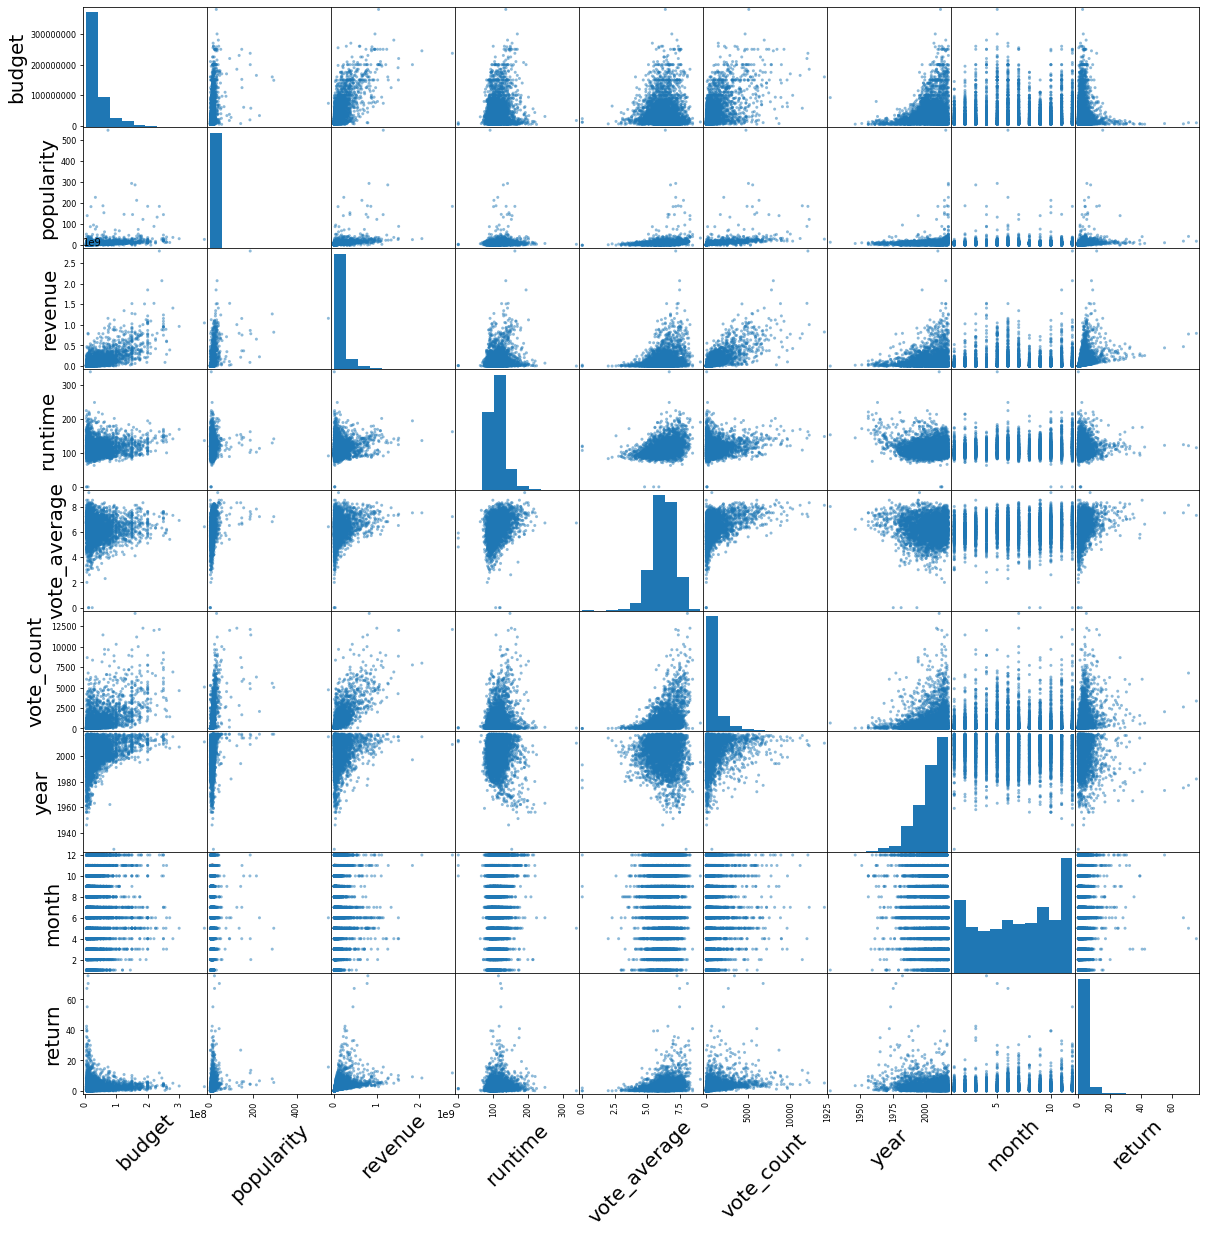

In [84]:
make_scatter_matrix(movies_condensed)

From a glance:
> * Budget
    * Looks like budget has a relatively linear relationship with revenue.
    * It doesn't look like runtime changes much with regards to budget, and it seems that lower budget movies have the largest variation in runtime. 
    * The same could be said with regards to vote average. 
    * On the other hand, it seems more users vote on higher budget movies. 
    * The budget for movies has increased over time, no surprise there, though there is one movie that was made around 1940 and one around 1960 that had higher budgets than other movies made around the same time. 
    * It seems there are certain months where movies where released that had higher budgets - especially concentrated around the summer months, and then another peak in the winter(summer vacation and Holiday movies perhaps). 
    * Most returns are around 0. Most movies seem to not even be breaking even, and the ones that are seem to have much lower budgets.
> * Revenue
    * Runtime doesn't seem to change much with regards to revenue, the largest variation being with low revenue movies.
    * The same could be said with regards to vote average.
    * It seems more users vote on higher revenue movies.
    * The revenue for movies has increased over time, again, no surprise there, though there are some interesting looking outliers.
    * There seems to be a peak for revenue in the summer as well, though not as large as the revenue peak in the winter.
    * Most returns are around 0, the ones that are higher seem to have lower revenue. Maybe I have too many outliers that are clouding this field.
> * Runtime
    * Looks to stay relatively consistent across the board
> * Vote Average
    * Looks to stay relatively consistent across the board
> * Vote Count
    * Already talked about relationship to budget, revenue.
    * More users seem to vote on movies with a runtime between 100 and 200 minutes, which is where most movies fall anyway.
    * The vote averages tend to increase with vote count. It seems users are voting more on movies they like, and not as much on movies they don't like. 
    * Vote count is higher for more recently released movies, not too surprising.

There aren't many linear relationships to explore here, I think the most promising ones are budget and revenue (so an obvious test would be to see if a movie's budget can predict the revenue). But I think I want to explore more features (start with genres).

In [85]:
def model_linear_regression(df, target_col, lst_variable_cols):
    sorted_df = df.sort_values(by = [target_col])
    target = np.array(sorted_df[target_col])
    
    variables_df = sorted_df[lst_variable_cols]
    X = np.array(sm.add_constant(variables_df))
    
    model = sm.OLS(target, X)
    results = model.fit()
    residuals = results.resid
    return X, target, results, residuals

In [86]:
X, target, results, residuals = model_linear_regression(movies_condensed, 'revenue', ['budget', 'popularity'])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2566.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:23:03   Log-Likelihood:                -80016.
No. Observations:                3993   AIC:                         1.600e+05
Df Residuals:                    3990   BIC:                         1.601e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.148e+07   2.84e+06    -11.085      0.000   -3.71e+07   -2.59e+07
x1             2.8164      0.048     59.290      0.000       2.723       2.910
x2          2.912e+06   1.29e+05     22.538      0.000    2.66e+06    3.17e+06
==============================================================================
Omnibus:                     2725.636   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90819.966
Skew:                           2.794   Prob(JB):                         0.00
Kurtosis:                      25.686   Cond. No.                     8.66e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
def plot_predictions_vs_actual(X, target, results, x_label, y_label, actual_label, predict_label):
    betas = np.array(results.params).reshape(-1,1)
    y_p = np.dot(X, betas)
    
    x = np.arange(len(target))
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(x, target, label=actual_label)
    ax.plot(x, y_p, c='r',label=predict_label)
    ax.set_xlabel(x_label, fontsize = 20)
    ax.set_ylabel(y_label, fontsize = 20)
    ax.set_title('Actual vs Model Predictions', fontsize = 20)
    ax.legend();

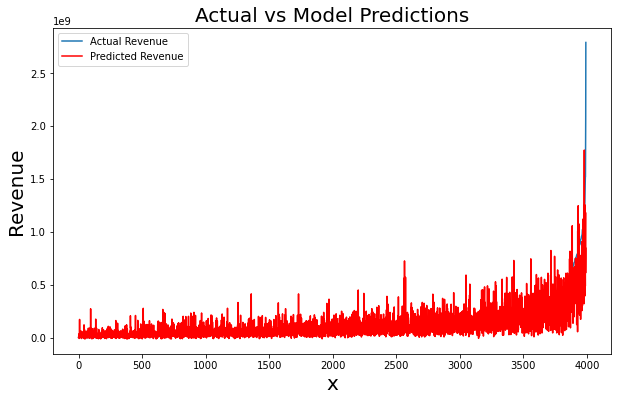

In [88]:
plot_predictions_vs_actual(X, target, results, 
                           'x',
                           'Revenue', 
                           'Actual Revenue', 
                           'Predicted Revenue')
plt.savefig('actual_vs_model_1.png')

In [89]:
def plot_residuals(X, target, results, residuals, x_label='Predicted', y_label='Residuals'):
    fig, ax = plt.subplots()
    y_predict = results.predict(X)
    ax.scatter(y_predict, residuals, alpha=0.5)
    ax.axhline(0, color='r', ls='--')
    ax.set_xlabel(x_label, fontsize = 20)
    ax.set_ylabel(y_label, fontsize = 20)

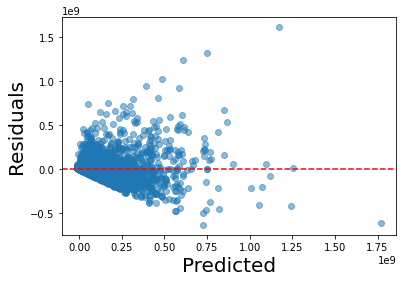

In [90]:
plot_residuals(X, target, results, residuals)
plt.savefig('residuals_1.png')

Try plotting log of target, refit model, replot residuals

In [91]:
def qq_plot(X, target, results, x_label ='Theoretical Quantiles', y_label='Ordered Values', title='QQ Plot vs Normal Distribution for Residuals'):
    fig, ax = plt.subplots(figsize = (8, 8))
    y_predict = results.predict(X)
    stats.probplot(target - y_predict, plot=ax)
    ax.set_title(title, fontsize = 18)
    ax.set_xlabel(x_label, fontsize = 20)
    ax.set_ylabel(y_label, fontsize = 20)
    
#fig, axs = plt.subplots(1, 2, figsize=((11,5)))
#predictions = credit_card_model.predict(credit_card)
#stats.probplot(credit_card['AVGEXP'] - predictions, plot=axs[0]);
#axs[0].set_title("QQ Plot vs Normal dist for Credit Card Residuals")

#predictions = credit_card_log_model.predict(credit_card)
#stats.probplot(credit_card['LOGAVGEXP'] - predictions, plot=axs[1]);
#axs[1].set_title("QQ Plot vs Normal dist for Credit Card Log Residuals")

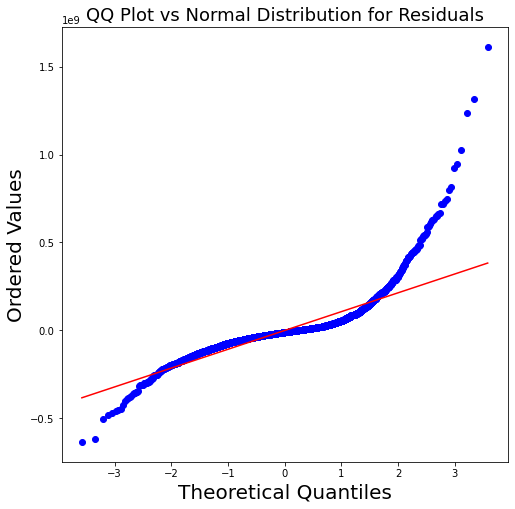

In [92]:
qq_plot(X, target, results)
plt.savefig('qq_plot_1.png')

In [93]:
movies_condensed['log_revenue'] = np.log(movies_condensed['revenue'])

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
X, target, results, residuals = model_linear_regression(movies_condensed, 'log_revenue', ['budget', 'popularity'])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     1015.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:23:05   Log-Likelihood:                -6915.6
No. Observations:                3993   AIC:                         1.384e+04
Df Residuals:                    3990   BIC:                         1.386e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5335      0.032    519.695      0.000      16.471      16.596
x1          2.111e-08   5.32e-10     39.679      0.000    2.01e-08    2.22e-08
x2             0.0141      0.001      9.735      0.000       0.011       0.017
==============================================================================
Omnibus:                      764.369   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1584.715
Skew:                          -1.125   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                     8.66e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

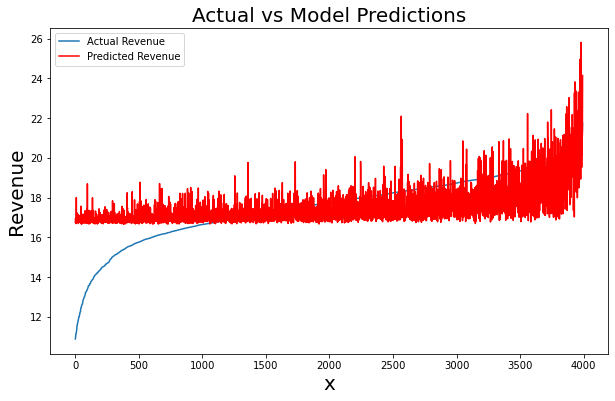

In [95]:
plot_predictions_vs_actual(X, target, results, 
                           'x',
                           'Revenue', 
                           'Actual Revenue', 
                           'Predicted Revenue')
plt.savefig('actual_vs_model_2.png')

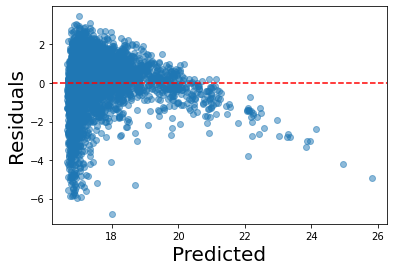

In [96]:
plot_residuals(X, target, results, residuals)
plt.savefig('log_residuals_1.png')

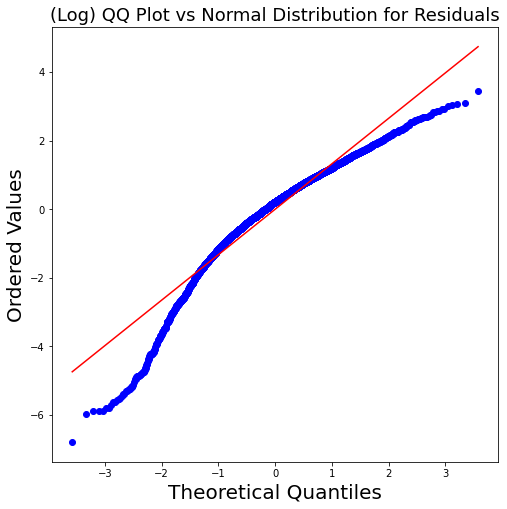

In [97]:
qq_plot(X, target, results, title = '(Log) QQ Plot vs Normal Distribution for Residuals' )
plt.savefig('log_qq_plot1.png')

### Exploring Genres

In [98]:
def get_counts(df, column):
    column_df = pd.DataFrame(df[column])
    column_counts = column_df[column].explode().value_counts()
    column_counts_df = column_counts.to_frame('counts').reset_index()
    column_counts_df = column_counts_df.rename(columns = {'index': column})
    
    return column_counts_df

In [99]:
genres_counts_df = get_counts(movies_condensed, 'genres')
genres_counts_df

,genres,counts
0,Drama,1819
1,Comedy,1400
2,Action,1213
3,Thriller,1179
4,Adventure,850
5,Romance,705
6,Crime,666
7,Science Fiction,523
8,Family,487
9,Fantasy,443


In [100]:
#fig, ax = plt.subplots(figsize = (18, 8))
#x_data = genres_counts_df['genre']
#y_data = genres_counts_df['counts']

#ax.bar(x_data, y_data)

#ax.set_xlabel('Genre', fontsize = 20)
#ax.set_xticklabels(x_data, rotation = 45, fontsize = 20)
#ax.set_ylabel('# of Movies', fontsize = 20)
#ax.set_title('Counts of Movies by Genre', fontsize = 24)

#fig.tight_layout()

In [101]:
def counts_horizontal_bar(df, x_column, y_column, x_min, x_max, x_inc, ax):
    x_data = df[x_column]
    y_data = df[y_column]
    y = np.arange(len(y_data))
    x = np.linspace(x_min, x_max, (x_max-x_min)//x_inc + 1, dtype='int')
    
    ax.barh(y_data, x_data)
    ax.invert_yaxis()
    ax.set_yticks(y)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize = 18, rotation = 45)
    ax.set_yticklabels(y_data, fontsize = 18)
    ax.xaxis.grid(True)
    fig.tight_layout()

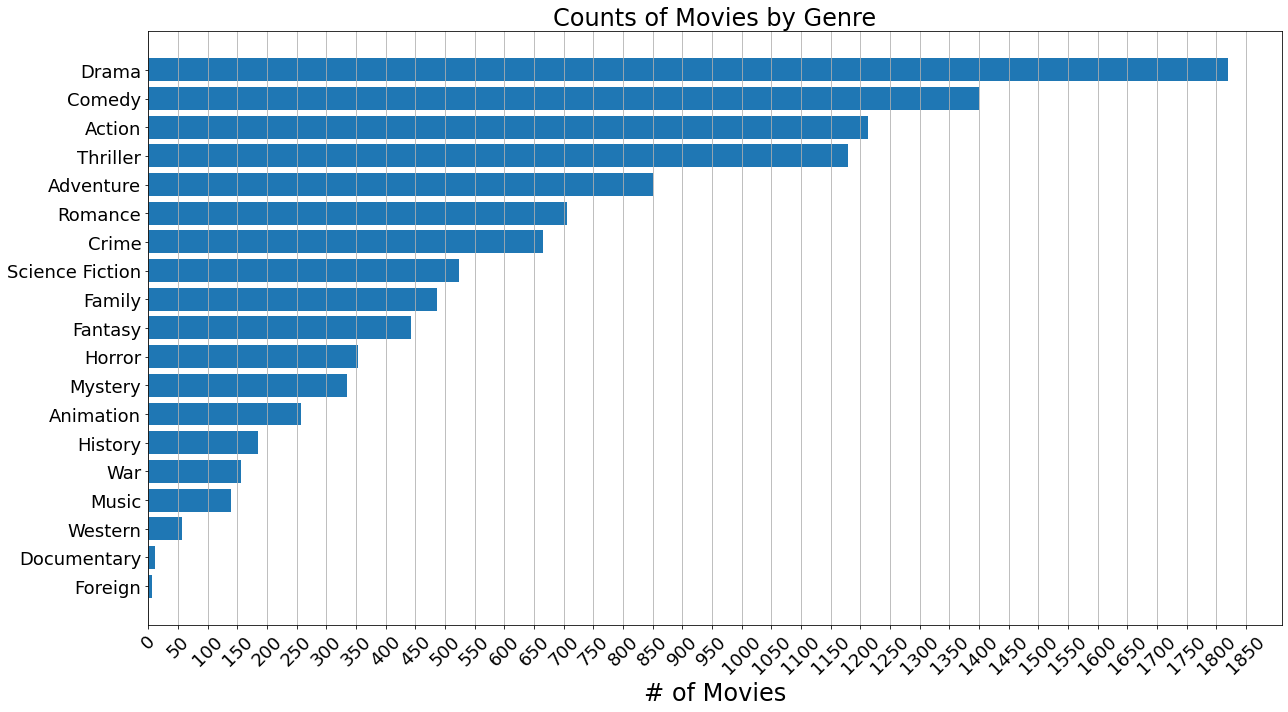

In [102]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('# of Movies', fontsize = 24)
ax.set_title('Counts of Movies by Genre', fontsize = 24)

counts_horizontal_bar(genres_counts_df, 'counts', 'genres', 0, 1850, 50, ax)
#plt.savefig('movie_counts_by_genre.png')

In [103]:
def get_list(df, column):
    lst = df[column].tolist()
    return lst

In [104]:
genres_list = get_list(genres_counts_df, 'genres')
genres_list

['Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Adventure',
 'Romance',
 'Crime',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Animation',
 'History',
 'War',
 'Music',
 'Western',
 'Documentary',
 'Foreign']

In [105]:
def create_bool_columns(df, column_name, list_of_columns):
    for column in list_of_columns:
        df[column] = df[column_name].apply(lambda x: 1 if column in x else 0)

In [106]:
create_bool_columns(df = movies_condensed, column_name = 'genres', list_of_columns = genres_list)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
movies_condensed.head()

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,Fantasy,Horror,Mystery,Animation,History,War,Music,Western,Documentary,Foreign
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,...,0,0,0,1,0,0,0,0,0,0
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,...,1,0,0,0,0,0,0,0,0,0
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,...,0,0,0,0,0,0,0,0,0,0
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,...,0,0,0,0,0,0,0,0,0,0
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#def make_genre_specific_df(df, genre):
    #return df[df[genre] == 1]

In [109]:
#drama = make_genre_specific_df(movies_condensed, 'Drama')
#comedy = make_genre_specific_df(movies_condensed, 'Comedy')
#thriller = make_genre_specific_df(movies_condensed, 'Thriller')
#romance = make_genre_specific_df(movies_condensed, 'Romance')
#action = make_genre_specific_df(movies_condensed, 'Action')
#horror = make_genre_specific_df(movies_condensed, 'Horror')
#crime = make_genre_specific_df(movies_condensed, 'Crime')
#documentary = make_genre_specific_df(movies_condensed, 'Documentary')
#adventure = make_genre_specific_df(movies_condensed, 'Adventure')
#science_fiction = make_genre_specific_df(movies_condensed, 'Science Fiction')
#family = make_genre_specific_df(movies_condensed, 'Family')
#mystery = make_genre_specific_df(movies_condensed, 'Mystery')
#fantasy = make_genre_specific_df(movies_condensed, 'Fantasy')
#animation = make_genre_specific_df(movies_condensed, 'Animation')
#foreign = make_genre_specific_df(movies_condensed, 'Foreign')
#music = make_genre_specific_df(movies_condensed, 'Music')
#history = make_genre_specific_df(movies_condensed, 'History')
#war = make_genre_specific_df(movies_condensed, 'War')
#western = make_genre_specific_df(movies_condensed, 'Western')

In [110]:
#drama.describe()

In [111]:
def broadcast_and_clean(df, broadcast_col, list_of_columns):
    out_df = df[[broadcast_col] + list_of_columns]
    
    for column in list_of_columns:
        out_df[column] = out_df[column]*out_df[broadcast_col]
    
    out_df = out_df.drop(columns = [broadcast_col])
    out_df = out_df.replace(0.0,np.nan)
    
    return out_df


In [112]:
runtime_genres = broadcast_and_clean(movies_condensed,'runtime', genres_list)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [113]:
def violin_plot_by_genre(data, x_labels, y_label, title):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_ylabel(y_label, fontsize = 24)
    ax.set_title(title, fontsize = 24)
    plt.yticks(fontsize=20)
    ax.set_xticklabels(x_labels, fontsize = 20, rotation=45)
    sns.violinplot(data=data, ax=ax)
    fig.tight_layout()
    #plt.savefig('return_by_genre.png')

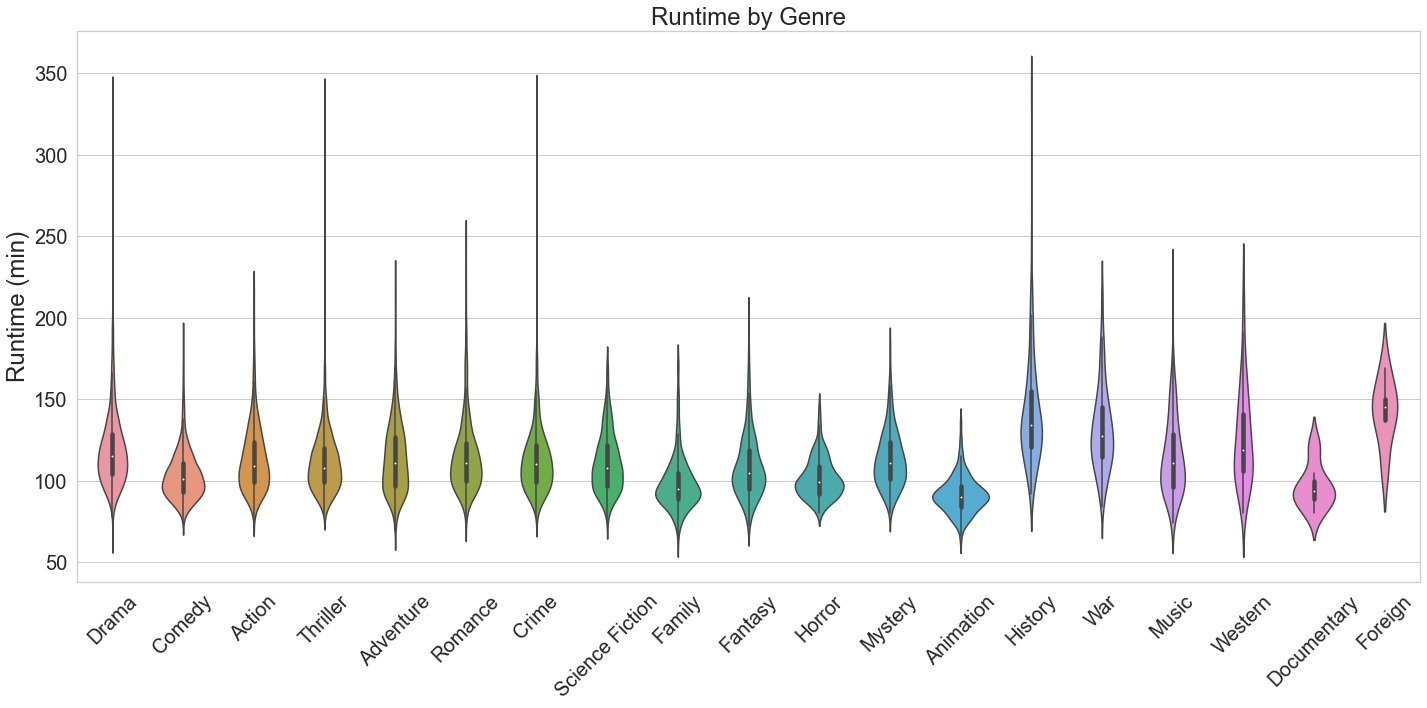

In [114]:
violin_plot_by_genre(runtime_genres, genres_list, 'Runtime (min)', 'Runtime by Genre')

In [115]:
movies_condensed.head()

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,Fantasy,Horror,Mystery,Animation,History,War,Music,Western,Documentary,Foreign
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,...,0,0,0,1,0,0,0,0,0,0
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,...,1,0,0,0,0,0,0,0,0,0
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,...,0,0,0,0,0,0,0,0,0,0
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,...,0,0,0,0,0,0,0,0,0,0
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,...,0,0,0,0,0,0,0,0,0,0


In [116]:
movies_condensed[movies_condensed['History'] == 1]['runtime']

13       192.0
108      177.0
188      135.0
231      127.0
360      140.0
         ...  
43165    126.0
43229    140.0
43575    161.0
44557    120.0
44678    107.0
Name: runtime, Length: 184, dtype: float64

Mean runtime for history and animation different?

In [117]:
stats.ttest_ind(movies_condensed[movies_condensed['History'] == 1]['runtime'], movies_condensed[movies_condensed['Animation'] == 1]['runtime'], equal_var = False)

Ttest_indResult(statistic=19.829904883517283, pvalue=2.173526429849459e-50)

In [118]:
stats.normaltest(movies_condensed[movies_condensed['History'] == 1]['runtime'])

NormaltestResult(statistic=93.05328901416235, pvalue=6.219207243369415e-21)

The history genre doesn't appear to be normally distributed

In [119]:
return_genres = broadcast_and_clean(movies_condensed,'return', genres_list)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


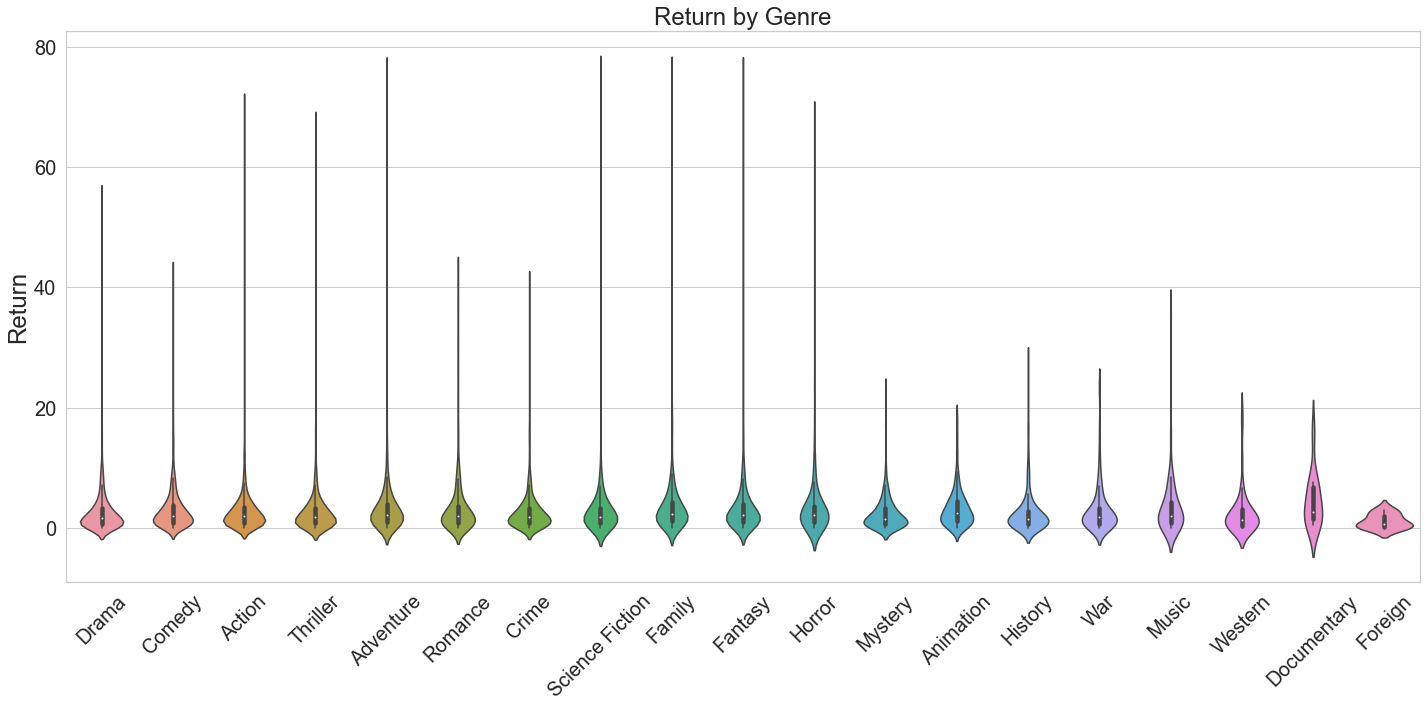

In [120]:
violin_plot_by_genre(return_genres, genres_list, 'Return', 'Return by Genre')

I increased budget until I was able to see clear violin plots. Still have some outliers

In [121]:
def get_top(df, num, column, list_of_columns):
    out_df = df.nlargest(num, column)[list_of_columns]
    return out_df

In [122]:
top_return = get_top(movies_condensed, 20,'return', ['title','belongs_to_collection', 'budget', 'revenue', 'return','genres'])
top_return

,title,belongs_to_collection,budget,revenue,return,genres
1065,E.T. the Extra-Terrestrial,[],10500000,792965326,75.520507,"[Science Fiction, Adventure, Family, Fantasy]"
256,Star Wars,[Star Wars Collection],11000000,775398007,70.490728,"[Adventure, Action, Science Fiction]"
1338,Jaws,[The Jaws Collection],7000000,470654000,67.236286,"[Horror, Thriller, Adventure]"
1888,The Exorcist,[The Exorcist Collection],8000000,441306145,55.163268,"[Drama, Horror, Thriller]"
352,Four Weddings and a Funeral,[],6000000,254700832,42.450139,"[Comedy, Drama, Romance]"
834,The Godfather,[The Godfather Collection],6000000,245066411,40.844402,"[Drama, Crime]"
4492,Look Who's Talking,[Look Who's Talking Collection],7500000,296000000,39.466667,"[Comedy, Romance]"
24258,Annabelle,[Annabelle Collection],6500000,255273813,39.272894,[Horror]
1056,Dirty Dancing,[Dirty Dancing Collection],6000000,213954274,35.659046,"[Drama, Music, Romance]"
1006,The Sound of Music,[],8200000,286214286,34.904181,"[Drama, Family, Music, Romance]"


In [123]:
top_return = top_return[['title','return']]
top_return

,title,return
1065,E.T. the Extra-Terrestrial,75.520507
256,Star Wars,70.490728
1338,Jaws,67.236286
1888,The Exorcist,55.163268
352,Four Weddings and a Funeral,42.450139
834,The Godfather,40.844402
4492,Look Who's Talking,39.466667
24258,Annabelle,39.272894
1056,Dirty Dancing,35.659046
1006,The Sound of Music,34.904181


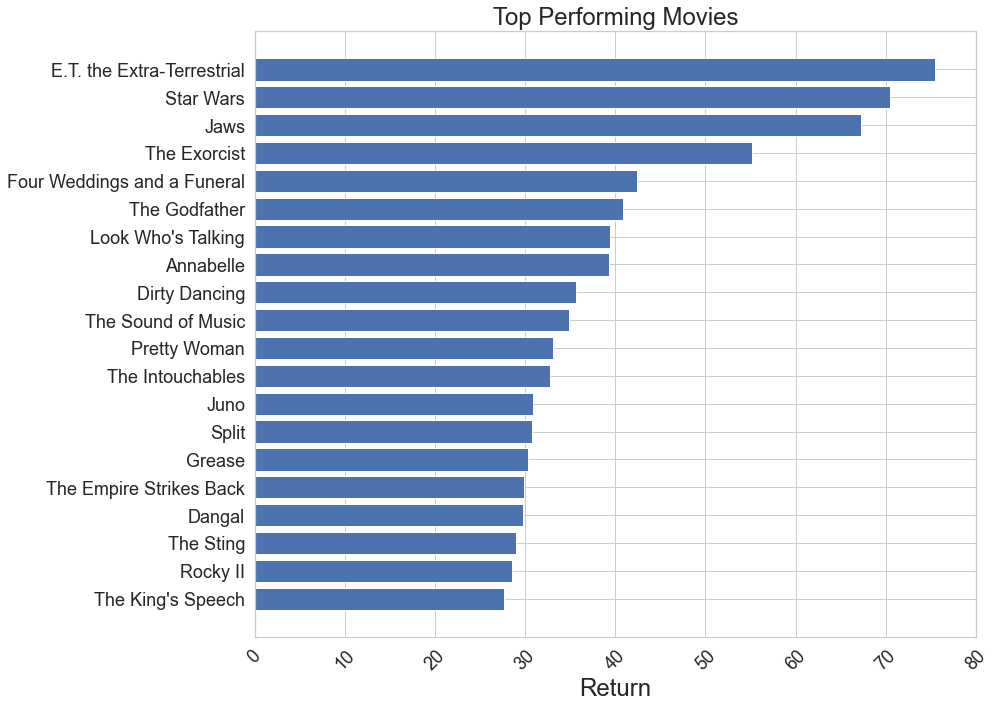

In [124]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlabel('Return', fontsize = 24)
ax.set_title('Top Performing Movies', fontsize = 24)

#plt.savefig('top_performing_movies.png')
counts_horizontal_bar(top_return, 'return', 'title', 0, 80, 10, ax)

In [125]:
return_std = movies_condensed['return'].std()
return_std

4.2842291380083894

In [126]:
return_mean = movies_condensed['return'].mean()
return_mean

3.020130372954832

In [127]:
movies_wo_return_outliers = movies_condensed[movies_condensed['return'] <= 3*return_std + return_mean]
movies_wo_return_outliers['return'].describe()

count    3927.000000
mean        2.628693
std         2.602668
min         0.001134
25%         0.795353
50%         1.887049
75%         3.494391
max        15.868772
Name: return, dtype: float64

In [128]:
return_genres_wo_outliers = broadcast_and_clean(movies_wo_return_outliers,'return', genres_list)
return_genres_wo_outliers.describe()

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Drama,Comedy,Action,Thriller,Adventure,Romance,Crime,Science Fiction,Family,Fantasy,Horror,Mystery,Animation,History,War,Music,Western,Documentary,Foreign
count,1785.000000,1381.000000,1201.000000,1162.000000,836.000000,686.000000,658.000000,518.000000,476.000000,438.000000,345.000000,330.000000,254.000000,181.000000,153.000000,135.000000,55.000000,11.000000,6.000000
mean,2.366063,2.830840,2.541047,2.402231,2.901316,2.730750,2.419394,2.502757,2.978470,2.874186,2.773145,2.231632,3.178548,2.209874,2.614403,2.942078,1.894675,3.555069,1.165868
std,2.517056,2.738166,2.386752,2.356945,2.653552,2.785684,2.380242,2.390185,2.576096,2.729727,2.674581,2.156512,2.871394,2.505414,2.762847,2.943443,2.121741,2.711381,1.204657
min,0.003612,0.001134,0.001134,0.005092,0.003612,0.006024,0.005165,0.003103,0.001134,0.003103,0.008383,0.006049,0.001134,0.003612,0.003612,0.010895,0.016713,0.563677,0.115970
25%,0.624139,0.912671,0.875421,0.763807,1.026595,0.750436,0.789360,0.811894,1.141176,1.027786,0.933122,0.628801,1.109939,0.658124,0.717714,0.770607,0.394238,1.413113,0.240744
50%,1.571364,2.026874,1.915553,1.757219,2.188951,1.872976,1.791641,1.870329,2.288226,2.110396,2.157719,1.460606,2.485268,1.473751,1.696399,1.853684,1.250000,2.726501,0.701943
75%,3.114969,3.805012,3.462006,3.290596,3.951434,3.521502,3.292880,3.245124,4.200637,3.831220,3.477939,3.190918,4.380495,2.729329,3.114969,4.119727,2.638841,6.238730,1.987013
max,15.189432,15.631499,14.998252,15.868772,15.631499,15.286235,15.868772,15.189432,15.631499,15.286235,15.868772,12.360476,15.631499,14.607526,14.607526,15.094022,11.368389,7.572458,2.972973


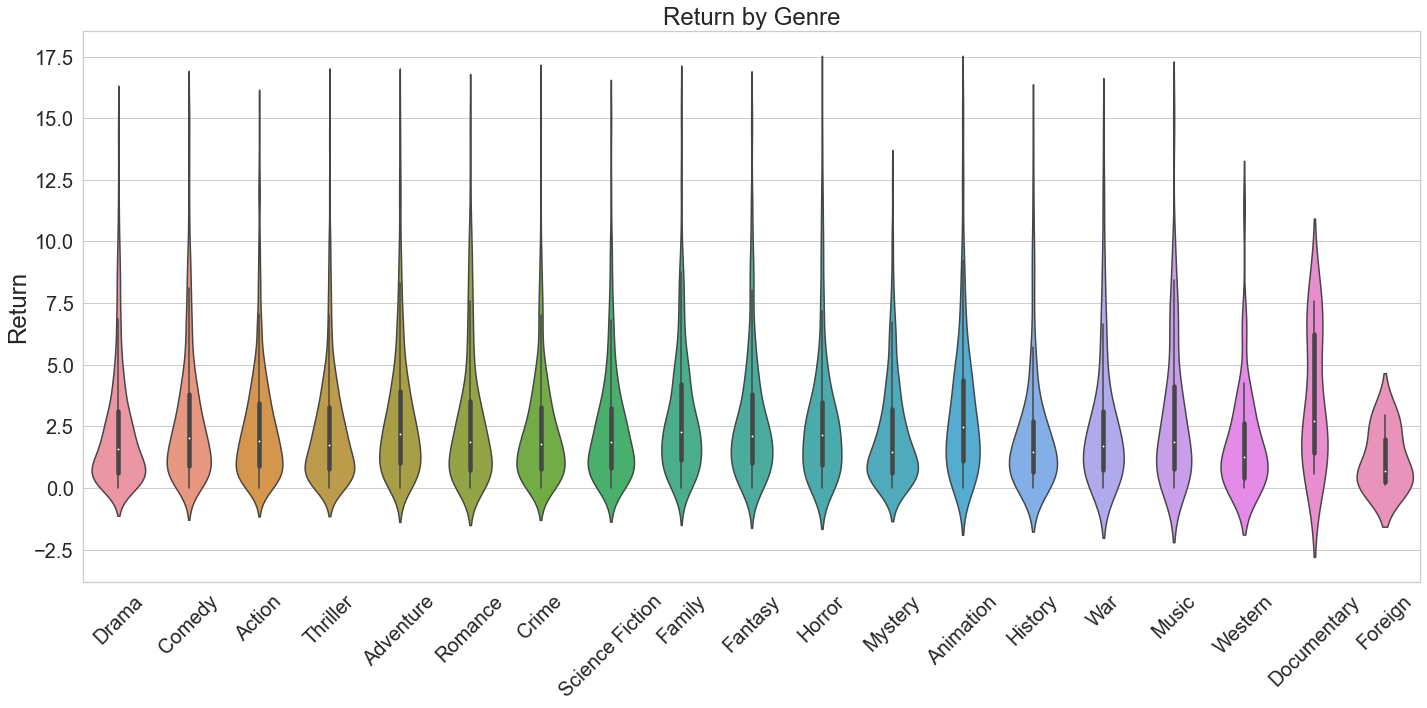

In [129]:
violin_plot_by_genre(return_genres_wo_outliers, genres_list, 'Return', 'Return by Genre')

In [130]:
return_genres_wo_outliers.describe()

,Drama,Comedy,Action,Thriller,Adventure,Romance,Crime,Science Fiction,Family,Fantasy,Horror,Mystery,Animation,History,War,Music,Western,Documentary,Foreign
count,1785.000000,1381.000000,1201.000000,1162.000000,836.000000,686.000000,658.000000,518.000000,476.000000,438.000000,345.000000,330.000000,254.000000,181.000000,153.000000,135.000000,55.000000,11.000000,6.000000
mean,2.366063,2.830840,2.541047,2.402231,2.901316,2.730750,2.419394,2.502757,2.978470,2.874186,2.773145,2.231632,3.178548,2.209874,2.614403,2.942078,1.894675,3.555069,1.165868
std,2.517056,2.738166,2.386752,2.356945,2.653552,2.785684,2.380242,2.390185,2.576096,2.729727,2.674581,2.156512,2.871394,2.505414,2.762847,2.943443,2.121741,2.711381,1.204657
min,0.003612,0.001134,0.001134,0.005092,0.003612,0.006024,0.005165,0.003103,0.001134,0.003103,0.008383,0.006049,0.001134,0.003612,0.003612,0.010895,0.016713,0.563677,0.115970
25%,0.624139,0.912671,0.875421,0.763807,1.026595,0.750436,0.789360,0.811894,1.141176,1.027786,0.933122,0.628801,1.109939,0.658124,0.717714,0.770607,0.394238,1.413113,0.240744
50%,1.571364,2.026874,1.915553,1.757219,2.188951,1.872976,1.791641,1.870329,2.288226,2.110396,2.157719,1.460606,2.485268,1.473751,1.696399,1.853684,1.250000,2.726501,0.701943
75%,3.114969,3.805012,3.462006,3.290596,3.951434,3.521502,3.292880,3.245124,4.200637,3.831220,3.477939,3.190918,4.380495,2.729329,3.114969,4.119727,2.638841,6.238730,1.987013
max,15.189432,15.631499,14.998252,15.868772,15.631499,15.286235,15.868772,15.189432,15.631499,15.286235,15.868772,12.360476,15.631499,14.607526,14.607526,15.094022,11.368389,7.572458,2.972973


In [131]:
top_return_wo = get_top(movies_wo_return_outliers, 20,'return', ['title','belongs_to_collection', 'budget', 'revenue', 'return','genres'])
top_return_wo

,title,belongs_to_collection,budget,revenue,return,genres
39688,Don't Breathe,[],9900000,157100845,15.868772,"[Crime, Horror, Thriller]"
30700,Minions,[Despicable Me Collection],74000000,1156730962,15.631499,"[Family, Animation, Adventure, Comedy]"
227,Dumb and Dumber,[Dumb and Dumber Collection],16000000,247275374,15.454711,[Comedy]
362,The Mask,[The Mask Collection],23000000,351583407,15.286235,"[Romance, Comedy, Crime, Fantasy]"
3351,Close Encounters of the Third Kind,[],20000000,303788635,15.189432,"[Science Fiction, Drama]"
10014,Crash,[],6500000,98410061,15.140009,[Drama]
588,Beauty and the Beast,[Beauty and the Beast Collection],25000000,377350553,15.094022,"[Romance, Family, Animation, Fantasy, Music]"
35083,Monkey King: Hero Is Back,[],10000000,150000000,15.000000,"[Fantasy, Animation, Comedy]"
3958,Beverly Hills Cop II,[Beverly Hills Cop Collection],20000000,299965036,14.998252,"[Action, Comedy, Crime]"
3318,Teenage Mutant Ninja Turtles,[Teenage Mutant Ninja Turtles (Original) Colle...,13500000,202000000,14.962963,"[Science Fiction, Action, Adventure, Comedy, F..."


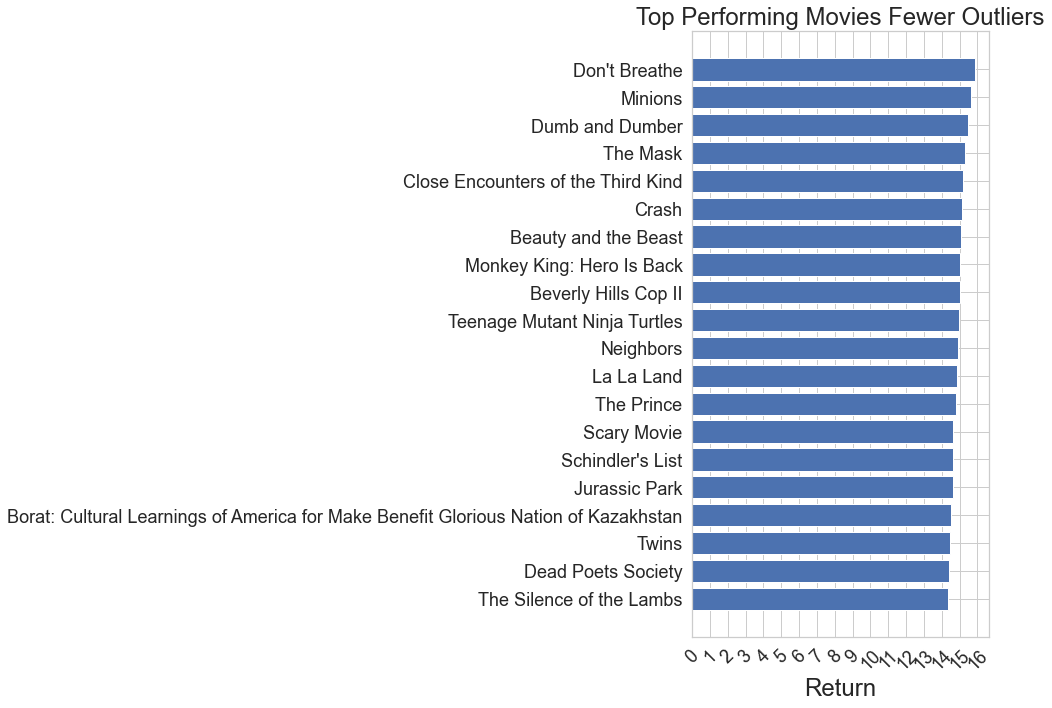

In [132]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlabel('Return', fontsize = 24)
ax.set_title('Top Performing Movies Fewer Outliers', fontsize = 24)

plt.savefig('top_performing_movies_wo_outliers.png')
counts_horizontal_bar(top_return_wo, 'return', 'title', 0, 16, 1, ax)

### Exploring Production Companies

In [133]:
company_counts_df = get_counts(movies_condensed, 'production_companies')
company_counts_df = company_counts_df[company_counts_df['counts'] > 50]
company_counts_df

,production_companies,counts
0,Warner Bros.,375
1,Universal Pictures,345
2,Paramount Pictures,280
3,Twentieth Century Fox Film Corporation,260
4,Columbia Pictures,198
5,New Line Cinema,163
6,Walt Disney Pictures,129
7,Touchstone Pictures,125
8,Relativity Media,112
9,Metro-Goldwyn-Mayer (MGM),112


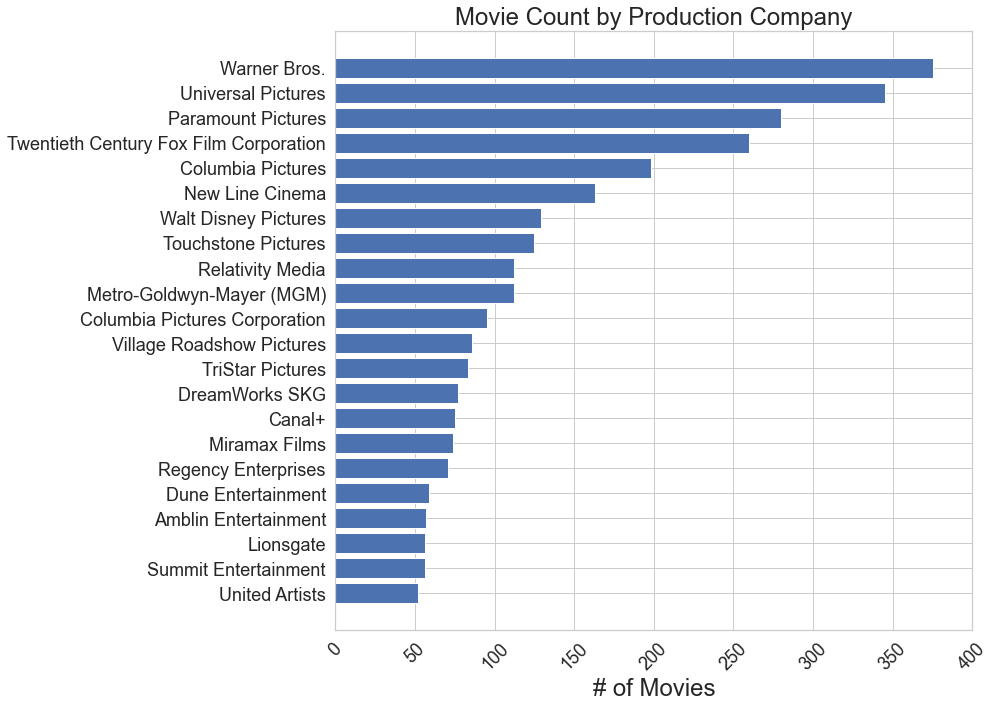

In [134]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlabel('# of Movies', fontsize = 24)
ax.set_title('Movie Count by Production Company', fontsize = 24)

#plt.savefig('movie_count_by_company.png')
counts_horizontal_bar(company_counts_df, 'counts', 'production_companies', 0, 400, 50, ax)

In [135]:
companies_list = get_list(company_counts_df, 'production_companies')
companies_list

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Relativity Media',
 'Metro-Goldwyn-Mayer (MGM)',
 'Columbia Pictures Corporation',
 'Village Roadshow Pictures',
 'TriStar Pictures',
 'DreamWorks SKG',
 'Canal+',
 'Miramax Films',
 'Regency Enterprises',
 'Dune Entertainment',
 'Amblin Entertainment',
 'Lionsgate',
 'Summit Entertainment',
 'United Artists']

In [136]:
create_bool_columns(df = movies_condensed, column_name = 'production_companies', list_of_columns = companies_list)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
movies_condensed.head()

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,TriStar Pictures,DreamWorks SKG,Canal+,Miramax Films,Regency Enterprises,Dune Entertainment,Amblin Entertainment,Lionsgate,Summit Entertainment,United Artists
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,...,0,0,0,0,0,0,0,0,0,0
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,...,1,0,0,0,0,0,0,0,0,0
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,...,0,0,0,0,0,0,0,0,0,0
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,...,0,0,0,0,1,0,0,0,0,0
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#pd.set_option('display.max_colwidth',100)
top_companies = get_top(movies_condensed, 20,'return', ['production_companies', 'title'])
top_companies

,production_companies,title
1065,"[Universal Pictures, Amblin Entertainment]",E.T. the Extra-Terrestrial
256,"[Lucasfilm, Twentieth Century Fox Film Corpora...",Star Wars
1338,"[Universal Pictures, Zanuck/Brown Productions]",Jaws
1888,"[Warner Bros., Hoya Productions]",The Exorcist
352,"[Channel Four Films, PolyGram Filmed Entertain...",Four Weddings and a Funeral
834,"[Paramount Pictures, Alfran Productions]",The Godfather
4492,"[TriStar Pictures, Management Company Entertai...",Look Who's Talking
24258,"[New Line Cinema, The Safran Company, Evergree...",Annabelle
1056,"[Great American Films Limited Partnership, Ves...",Dirty Dancing
1006,"[Twentieth Century Fox Film Corporation, Rober...",The Sound of Music


In [139]:
#company_list = get_list(company_counts_df, 'production_companies')
#company_list

### Exploring Production Countries

In [140]:
countries_counts = get_counts(movies_condensed, 'production_countries')
countries_counts

,production_countries,counts
0,United States of America,3478
1,United Kingdom,531
2,France,293
3,Germany,273
4,Canada,187
...,...,...
65,Cambodia,1
66,Slovenia,1
67,Uruguay,1
68,Costa Rica,1


In [141]:
countries_counts = countries_counts[countries_counts.index <= 19]
countries_counts

,production_countries,counts
0,United States of America,3478
1,United Kingdom,531
2,France,293
3,Germany,273
4,Canada,187
5,Australia,93
6,India,89
7,Italy,80
8,Japan,68
9,China,65


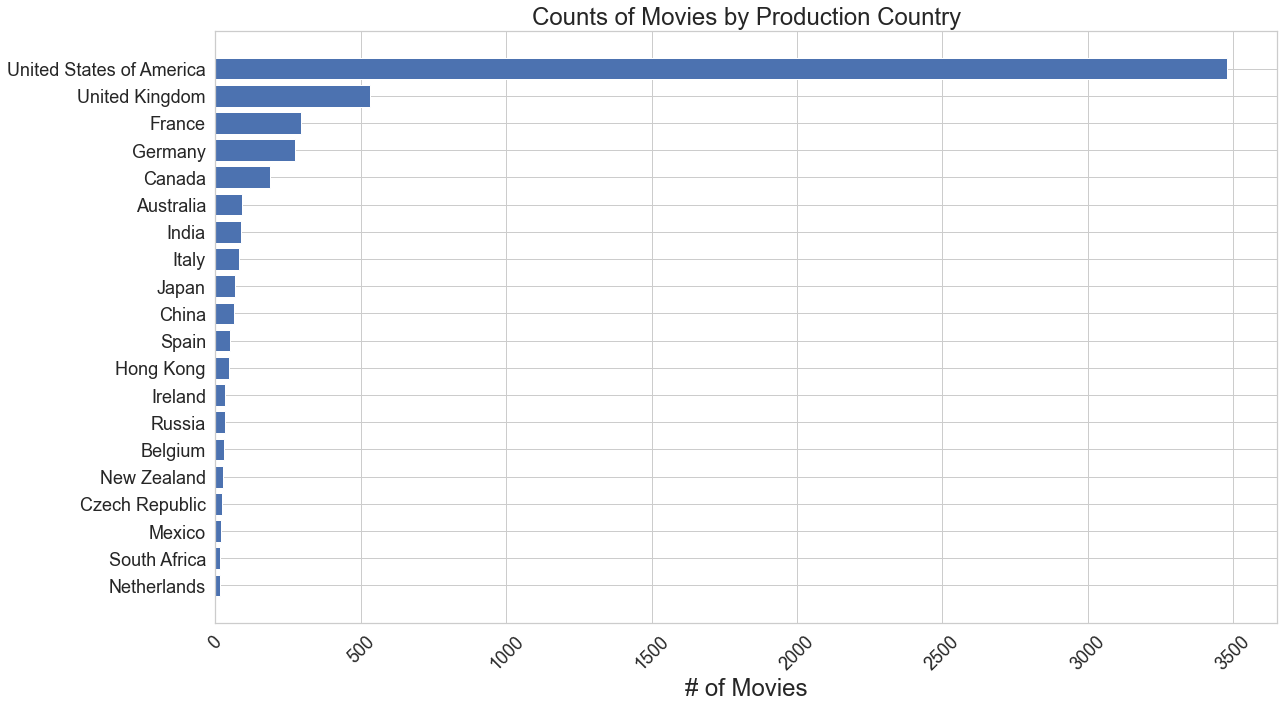

In [142]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('# of Movies', fontsize = 24)
ax.set_title('Counts of Movies by Production Country', fontsize = 24)

counts_horizontal_bar(countries_counts, 'counts', 'production_countries', 0, 3500, 500, ax)

In [143]:
countries_list = get_list(countries_counts, 'production_countries')
countries_list

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'India',
 'Italy',
 'Japan',
 'China',
 'Spain',
 'Hong Kong',
 'Ireland',
 'Russia',
 'Belgium',
 'New Zealand',
 'Czech Republic',
 'Mexico',
 'South Africa',
 'Netherlands']

In [144]:
create_bool_columns(df = movies_condensed, column_name = 'production_countries', list_of_columns = countries_list)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [145]:
movies_condensed.head()

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,Spain,Hong Kong,Ireland,Russia,Belgium,New Zealand,Czech Republic,Mexico,South Africa,Netherlands
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,...,0,0,0,0,0,0,0,0,0,0
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,...,0,0,0,0,0,0,0,0,0,0
3,[],16000000,"[Comedy, Drama, Romance]",31357,tt0114885,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156,...,0,0,0,0,0,0,0,0,0,0
5,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,...,0,0,0,0,0,0,0,0,0,0
8,[],35000000,"[Action, Adventure, Thriller]",9091,tt0114576,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171,...,0,0,0,0,0,0,0,0,0,0


## Trying to find best linear regression model

In [146]:
movies_condensed.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,return,log_revenue,...,Spain,Hong Kong,Ireland,Russia,Belgium,New Zealand,Czech Republic,Mexico,South Africa,Netherlands
count,3.993000e+03,3993.000000,3.993000e+03,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,...,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,4.103550e+07,11.091321,1.163914e+08,111.711245,6.239669,903.651139,2002.597546,7.027298,3.020130,17.556218,...,0.012772,0.011771,0.008515,0.008014,0.007513,0.006261,0.006011,0.004508,0.004257,0.004007
std,4.229321e+07,15.547481,1.846258e+08,21.110859,0.863748,1389.268886,11.009768,3.380883,4.284229,1.680051,...,0.112305,0.107865,0.091894,0.089173,0.086363,0.078888,0.077304,0.066998,0.065118,0.063182
min,5.037000e+06,0.000657,5.308600e+04,0.000000,0.000000,0.000000,1927.000000,1.000000,0.001134,10.879669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+07,6.629999,1.692912e+07,97.000000,5.700000,138.000000,1997.000000,4.000000,0.811027,16.644546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+07,9.304144,5.075234e+07,108.000000,6.300000,384.000000,2005.000000,7.000000,1.936726,17.742468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e+07,12.521071,1.353302e+08,122.000000,6.800000,1022.000000,2011.000000,10.000000,3.627306,18.723228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,547.488281,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,12.000000,75.520507,21.748578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
movies_condensed['log_revenue'] = np.log(movies_condensed['revenue'])

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
movies_condensed['log_budget'] = np.log(movies_condensed['budget'])

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
movies_condensed.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,return,log_revenue,...,Hong Kong,Ireland,Russia,Belgium,New Zealand,Czech Republic,Mexico,South Africa,Netherlands,log_budget
count,3.993000e+03,3993.000000,3.993000e+03,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,...,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,4.103550e+07,11.091321,1.163914e+08,111.711245,6.239669,903.651139,2002.597546,7.027298,3.020130,17.556218,...,0.011771,0.008515,0.008014,0.007513,0.006261,0.006011,0.004508,0.004257,0.004007,17.117815
std,4.229321e+07,15.547481,1.846258e+08,21.110859,0.863748,1389.268886,11.009768,3.380883,4.284229,1.680051,...,0.107865,0.091894,0.089173,0.086363,0.078888,0.077304,0.066998,0.065118,0.063182,0.897205
min,5.037000e+06,0.000657,5.308600e+04,0.000000,0.000000,0.000000,1927.000000,1.000000,0.001134,10.879669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.432321
25%,1.400000e+07,6.629999,1.692912e+07,97.000000,5.700000,138.000000,1997.000000,4.000000,0.811027,16.644546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.454568
50%,2.500000e+07,9.304144,5.075234e+07,108.000000,6.300000,384.000000,2005.000000,7.000000,1.936726,17.742468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.034386
75%,5.000000e+07,12.521071,1.353302e+08,122.000000,6.800000,1022.000000,2011.000000,10.000000,3.627306,18.723228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.727534
max,3.800000e+08,547.488281,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,12.000000,75.520507,21.748578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.755682


In [150]:
variables_list = ['budget','popularity','runtime','vote_average', 'vote_count', 'year', 'month'] + genres_list + countries_list + companies_list
variables_list

['budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Adventure',
 'Romance',
 'Crime',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Animation',
 'History',
 'War',
 'Music',
 'Western',
 'Documentary',
 'Foreign',
 'United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'India',
 'Italy',
 'Japan',
 'China',
 'Spain',
 'Hong Kong',
 'Ireland',
 'Russia',
 'Belgium',
 'New Zealand',
 'Czech Republic',
 'Mexico',
 'South Africa',
 'Netherlands',
 'Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Relativity Media',
 'Metro-Goldwyn-Mayer (MGM)',
 'Columbia Pictures Corporation',
 'Village Roadshow Pictures',
 'TriStar Pictures',
 'DreamWorks SKG',
 'Canal+',
 'Miramax Films',
 'Regency Enterprises',
 

In [151]:
X, target, results, residuals = model_linear_regression(movies_condensed, 'log_revenue', variables_list)

In [152]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     58.54
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:23:16   Log-Likelihood:                -6338.8
No. Observations:                3993   AIC:                         1.282e+04
Df Residuals:                    3924   BIC:                         1.325e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0213      4.409      1.139      0.255      -3.623      13.665
x1          1.251e-08   6.97e-10     17.954      0.000    1.11e-08    1.39e-08
x2             0.0014      0.001      0.982      0.326      -0.001       0.004
x3             0.0040      0.001      3.086      0.002       0.001       0.006
x4             0.3324      0.029     11.365      0.000       0.275       0.390
x5             0.0003   2.09e-05     13.889      0.000       0.000       0.000
x6             0.0043      0.002      1.965      0.049    9.92e-06       0.009
x7             0.0041      0.006      0.707      0.480      -0.007       0.015
x8            -0.4005      0.049     -8.139      0.000      -0.497      -0.304
x9             0.2061      0.051      4.048      0.000       0.106       0.306
x10            0.0920      0.052      1.763      0.078      -0.010       0.194
x11            0.0691      0.052      1.325      0.185      -0.033       0.171
x12            0.0233      0.056      0.413      0.679      -0.087       0.134
x13            0.1419      0.055      2.577      0.010       0.034       0.250
x14           -0.0131      0.057     -0.228      0.820      -0.126       0.100
x15           -0.2545      0.063     -4.040      0.000      -0.378      -0.131
x16            0.3622      0.080      4.509      0.000       0.205       0.520
x17            0.0146      0.067      0.220      0.826      -0.116       0.145
x18            0.3133      0.076      4.116      0.000       0.164       0.463
x19           -0.0771      0.073     -1.054      0.292      -0.221       0.066
x20            0.0443      0.104      0.426      0.670      -0.160       0.248
x21            0.0687      0.102      0.670      0.503      -0.132       0.270
x22            0.0668      0.106      0.628      0.530      -0.142       0.275
x23            0.0136      0.107      0.128      0.898      -0.196       0.223
x24           -0.5154      0.164     -3.150      0.002      -0.836      -0.195
x25            0.4411      0.353      1.249      0.212      -0.251       1.133
x26           -0.7203      0.503     -1.431      0.152      -1.707       0.266
x27            0.3698      0.074      4.968      0.000       0.224       0.516
x28           -0.0169      0.061     -0.279      0.780      -0.136       0.102
x29           -0.2458      0.090     -2.746      0.006      -0.421      -0.070
x30           -0.0349      0.078     -0.447      0.655      -0.188       0.118
x31           -0.0711      0.092     -0.775      0.438      -0.251       0.109
x32           -0.0089      0.138     -0.064      0.949      -0.280       0.263
x33            0.4737      0.151      3.145      0.002       0.178       0.769
x34           -0.1883      0.142     -1.325      0.185      -0.467       0.090
x35            0.1692      0.152      1.112      0.266      -0.129       0.467
x3

In [153]:
p_values = np.array(results.pvalues)
p_values

array([2.54810525e-01, 2.46617763e-69, 3.26058306e-01, 2.03960303e-03,
       1.79645843e-29, 7.56321137e-43, 4.94688632e-02, 4.79877269e-01,
       5.29905677e-16, 5.26442876e-05, 7.79018030e-02, 1.85267640e-01,
       6.79282283e-01, 1.00138547e-02, 8.19513911e-01, 5.45328248e-05,
       6.69266976e-06, 8.25935455e-01, 3.94075506e-05, 2.91818433e-01,
       6.70421824e-01, 5.02836684e-01, 5.30338583e-01, 8.98300314e-01,
       1.64321183e-03, 2.11729928e-01, 1.52367417e-01, 7.05435752e-07,
       7.80182945e-01, 6.06212774e-03, 6.54996715e-01, 4.38371656e-01,
       9.48841468e-01, 1.67221765e-03, 1.85351171e-01, 2.66118928e-01,
       3.92802958e-02, 7.76620310e-01, 2.11525070e-01, 1.61795875e-02,
       2.96002855e-01, 1.14000044e-01, 2.31945232e-01, 9.27942754e-01,
       6.70343300e-01, 1.56765439e-01, 3.80526670e-02, 7.15828015e-06,
       1.53619538e-18, 6.41821144e-15, 1.85533659e-13, 7.48489119e-10,
       3.14750783e-10, 2.15835759e-03, 5.71805008e-07, 2.72639801e-03,
      

In [154]:
def get_p_values_idx(results):
    p_values = np.array(results.pvalues)
    p_values_idx = np.argwhere(p_values < 0.05).reshape(1,-1).tolist()[0]
    return p_values_idx

def get_xvar(list_of_variables):
    d = {}
    for idx, var in enumerate(list_of_variables):
        d[idx] = var
    return d

def create_new_var_list(d, list_of_idx):
    new_var_list = []
    for idx in list_of_idx:
        if (idx - 1) in d:
            new_var_list.append(d[(idx -1)])
    return new_var_list

In [155]:
p_values_idx = get_p_values_idx(results)
d = get_xvar(variables_list)
new_var_list = create_new_var_list(d, p_values_idx)
X, target, results, residuals = model_linear_regression(movies_condensed, 'log_revenue', new_var_list)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     112.4
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:23:16   Log-Likelihood:                -6359.1
No. Observations:                3993   AIC:                         1.279e+04
Df Residuals:                    3957   BIC:                         1.302e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9906      4.249      1.410      0.159      -2.340      14.321
x1          1.289e-08   6.55e-10     19.673      0.000    1.16e-08    1.42e-08
x2             0.0039      0.001      3.301      0.001       0.002       0.006
x3             0.3323      0.028     11.801      0.000       0.277       0.387
x4             0.0003   1.96e-05     15.177      0.000       0.000       0.000
x5             0.0038      0.002      1.823      0.068      -0.000       0.008
x6            -0.4418      0.047     -9.363      0.000      -0.534      -0.349
x7             0.1683      0.046      3.625      0.000       0.077       0.259
x8             0.1110      0.053      2.104      0.035       0.008       0.214
x9            -0.2343      0.061     -3.859      0.000      -0.353      -0.115
x10            0.3521      0.066      5.303      0.000       0.222       0.482
x11            0.2832      0.072      3.912      0.000       0.141       0.425
x12           -0.5519      0.161     -3.418      0.001      -0.868      -0.235
x13            0.4327      0.069      6.297      0.000       0.298       0.567
x14           -0.2825      0.087     -3.263      0.001      -0.452      -0.113
x15            0.5111      0.145      3.535      0.000       0.228       0.795
x16            0.3116      0.153      2.037      0.042       0.012       0.611
x17           -0.5235      0.208     -2.519      0.012      -0.931      -0.116
x18           -0.6777      0.301     -2.248      0.025      -1.269      -0.087
x19            0.3670      0.071      5.180      0.000       0.228       0.506
x20            0.6569      0.073      9.023      0.000       0.514       0.800
x21            0.6076      0.079      7.693      0.000       0.453       0.762
x22            0.6520      0.082      7.938      0.000       0.491       0.813
x23            0.5651      0.092      6.165      0.000       0.385       0.745
x24            0.5969      0.099      6.049      0.000       0.403       0.790
x25            0.3428      0.120      2.848      0.004       0.107       0.579
x26            0.5482      0.112      4.904      0.000       0.329       0.767
x27            0.3364      0.120      2.814      0.005       0.102       0.571
x28            0.6735      0.128      5.281      0.000       0.423       0.924
x29            0.4978      0.135      3.680      0.000       0.233       0.763
x30            0.4711      0.139      3.379      0.001       0.198       0.744
x31            0.3298      0.160      2.066      0.039       0.017       0.643
x32            0.2960      0.143      2.077      0.038       0.017       0.575
x33            0.5285      0.145      3.641      0.000       0.244       0.813
x34            0.3477      0.164      2.126      0.034       0.027       0.668
x35            0.7760      0.172      4.512      0.000       0.439       1.113
==

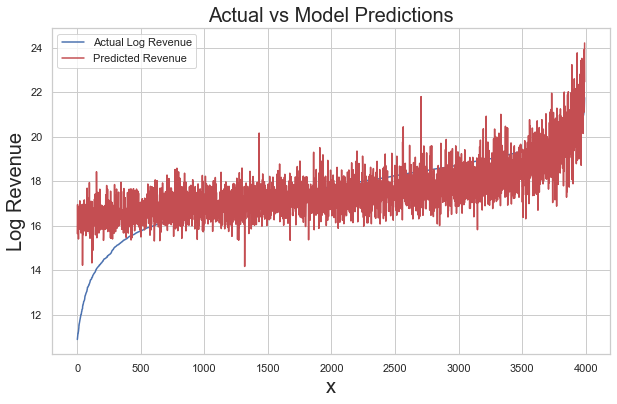

In [156]:
plot_predictions_vs_actual(X, target, results, 'x', 'Log Revenue', 'Actual Log Revenue', 'Predicted Revenue')
plt.savefig('actual_vs_model_3.png')

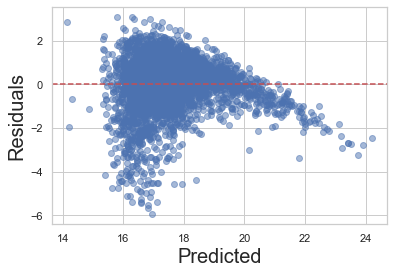

In [157]:
plot_residuals(X, target, results, residuals)
plt.savefig('log_residuals_2.png')

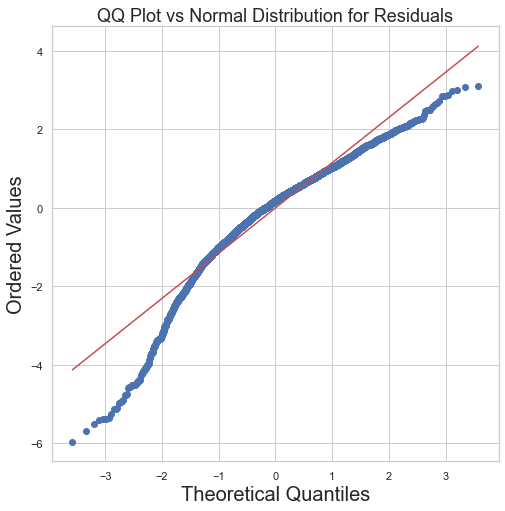

In [158]:
qq_plot(X, target, results)
plt.savefig('log_qq_plot_2.png')

## Ratings CSV

In [159]:
ratings = pd.read_csv('./archive/ratings.csv')
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [160]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [161]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [162]:
movies_condensed['id'] = movies_condensed['id'].astype(str)

/Users/coxem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
movies_condensed['id'].describe()

count      3993
unique     3989
top       77221
freq          2
Name: id, dtype: object

In [164]:
ratings_averaged = ratings.groupby('movieId')['rating'].mean()
ratings_averaged

movieId
1         3.888157
2         3.236953
3         3.175550
4         2.875713
5         3.079565
            ...   
176267    4.000000
176269    3.500000
176271    5.000000
176273    1.000000
176275    3.000000
Name: rating, Length: 45115, dtype: float64

In [165]:
ratings_averaged = ratings_averaged.to_frame('rating').reset_index()
ratings_averaged = ratings_averaged.rename(columns = {'index': 'movieId'})
ratings_averaged

,movieId,rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [166]:
ratings_averaged['movieId'] = ratings_averaged['movieId'].astype(str)
ratings_averaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45115 entries, 0 to 45114
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45115 non-null  object 
 1   rating   45115 non-null  float64
dtypes: float64(1), object(1)
memory usage: 705.0+ KB


In [167]:
ratings_averaged = ratings_averaged.rename(columns = {'rating': 'ratings_avg'})
ratings_averaged

,movieId,ratings_avg
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [168]:
ratings_averaged = ratings_averaged.dropna()

In [169]:
ratings_averaged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45115 entries, 0 to 45114
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      45115 non-null  object 
 1   ratings_avg  45115 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [170]:
movies_ratings = pd.merge(movies_condensed, ratings_averaged, how='inner', left_on = ['id'], right_on = ['movieId'])
movies_ratings

,belongs_to_collection,budget,genres,id,imdb_id,popularity,production_companies,production_countries,release_date,revenue,...,Russia,Belgium,New Zealand,Czech Republic,Mexico,South Africa,Netherlands,log_budget,movieId,ratings_avg
0,[Toy Story Collection],30000000,"[Animation, Comedy, Family]",862,tt0114709,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033,...,0,0,0,0,0,0,0,17.216708,862,3.598930
1,[],65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249,...,0,0,0,0,0,0,0,17.989898,8844,3.760163
2,[],60000000,"[Action, Crime, Drama, Thriller]",949,tt0113277,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818,...,0,0,0,0,0,0,0,17.909855,949,3.905544
3,[James Bond Collection],58000000,"[Adventure, Action, Thriller]",710,tt0113189,14.686036,"[United Artists, Eon Productions]","[United Kingdom, United States of America]",1995-11-16,352194034,...,0,0,0,0,0,0,0,17.875954,710,2.740334
4,[],98000000,"[Action, Adventure]",1408,tt0112760,7.284477,"[Le Studio Canal+, Laurence Mark Productions, ...","[France, Germany, Italy, United States of Amer...",1995-12-22,10017322,...,0,0,0,0,0,0,0,18.400478,1408,3.710181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,[],73000000,"[Family, Animation]",153518,tt1985949,11.171927,"[Columbia Pictures, Rovio Entertainment, Sony ...","[Finland, United States of America]",2016-05-11,349779543,...,0,0,0,0,0,0,0,18.105970,153518,2.285714
1212,[The Work and the Glory Collection],7500000,"[Drama, Romance]",36046,tt0410454,0.527570,[],[],2004-11-24,3347647,...,0,0,0,0,0,0,0,15.830414,36046,3.300000
1213,[Resident Evil Collection],40000000,"[Action, Horror, Science Fiction]",173897,tt2592614,0.755710,"[Constantin Film, Impact Pictures, Screen Gems...","[France, Australia, Canada, Germany]",2016-12-23,312242626,...,0,0,0,0,0,0,0,17.504390,173897,4.000000
1214,[],6000000,"[Action, Thriller]",102197,tt2321517,1.822246,"[Three T Productions, Studio Trite, Central Pa...",[Russia],2012-04-05,4588176,...,1,0,0,0,0,0,0,15.607270,102197,2.500000


In [171]:
movies_ratings.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,return,log_revenue,...,Ireland,Russia,Belgium,New Zealand,Czech Republic,Mexico,South Africa,Netherlands,log_budget,ratings_avg
count,1.216000e+03,1216.000000,1.216000e+03,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,...,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,4.645891e+07,11.689117,1.546939e+08,116.748355,6.500822,1202.546053,1999.085526,7.291118,4.093677,18.074426,...,0.006579,0.003289,0.004112,0.007401,0.009046,0.004934,0.003289,0.003289,17.258428,3.183435
std,4.424516e+07,8.386040,1.953362e+08,22.319841,0.867559,1591.706629,10.431478,3.308667,5.510997,1.478844,...,0.080877,0.057283,0.064018,0.085747,0.094719,0.070099,0.057283,0.057283,0.906400,0.554194
min,5.115000e+06,0.030576,6.064100e+04,0.000000,0.000000,0.000000,1927.000000,1.000000,0.001134,11.012727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.447688,0.880342
25%,1.500000e+07,7.784616,3.272155e+07,101.000000,6.000000,288.000000,1994.000000,5.000000,1.181411,17.303536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.523561,2.830866
50%,3.000000e+07,10.497076,8.973024e+07,113.500000,6.600000,638.500000,2001.000000,7.000000,2.565620,18.312314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.216708,3.249699
75%,6.019875e+07,13.433791,1.931931e+08,127.000000,7.100000,1448.250000,2006.000000,10.000000,4.833907,19.079199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.913146,3.604408
max,3.800000e+08,140.950241,1.845034e+09,248.000000,8.500000,14075.000000,2016.000000,12.000000,75.520507,21.335764,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.755682,4.500000


In [172]:
variables_list = ['budget','popularity','runtime','vote_average', 'ratings_avg'] + genres_list + companies_list + countries_list
variables_list

['budget',
 'popularity',
 'runtime',
 'vote_average',
 'ratings_avg',
 'Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Adventure',
 'Romance',
 'Crime',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Animation',
 'History',
 'War',
 'Music',
 'Western',
 'Documentary',
 'Foreign',
 'Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Relativity Media',
 'Metro-Goldwyn-Mayer (MGM)',
 'Columbia Pictures Corporation',
 'Village Roadshow Pictures',
 'TriStar Pictures',
 'DreamWorks SKG',
 'Canal+',
 'Miramax Films',
 'Regency Enterprises',
 'Dune Entertainment',
 'Amblin Entertainment',
 'Lionsgate',
 'Summit Entertainment',
 'United Artists',
 'United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'India',
 'Italy',
 'Japan',
 'China',
 'Spain',
 'Hong Kong',
 'Ireland',
 'Russia',
 'Be

In [173]:
d = get_xvar(variables_list)
d

{0: 'budget',
 1: 'popularity',
 2: 'runtime',
 3: 'vote_average',
 4: 'ratings_avg',
 5: 'Drama',
 6: 'Comedy',
 7: 'Action',
 8: 'Thriller',
 9: 'Adventure',
 10: 'Romance',
 11: 'Crime',
 12: 'Science Fiction',
 13: 'Family',
 14: 'Fantasy',
 15: 'Horror',
 16: 'Mystery',
 17: 'Animation',
 18: 'History',
 19: 'War',
 20: 'Music',
 21: 'Western',
 22: 'Documentary',
 23: 'Foreign',
 24: 'Warner Bros.',
 25: 'Universal Pictures',
 26: 'Paramount Pictures',
 27: 'Twentieth Century Fox Film Corporation',
 28: 'Columbia Pictures',
 29: 'New Line Cinema',
 30: 'Walt Disney Pictures',
 31: 'Touchstone Pictures',
 32: 'Relativity Media',
 33: 'Metro-Goldwyn-Mayer (MGM)',
 34: 'Columbia Pictures Corporation',
 35: 'Village Roadshow Pictures',
 36: 'TriStar Pictures',
 37: 'DreamWorks SKG',
 38: 'Canal+',
 39: 'Miramax Films',
 40: 'Regency Enterprises',
 41: 'Dune Entertainment',
 42: 'Amblin Entertainment',
 43: 'Lionsgate',
 44: 'Summit Entertainment',
 45: 'United Artists',
 46: 'United 

In [174]:
X, target, results, residuals = model_linear_regression(movies_ratings, 'log_revenue', variables_list)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     16.12
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          6.43e-120
Time:                        13:23:36   Log-Likelihood:                -1806.9
No. Observations:                1216   AIC:                             3746.
Df Residuals:                    1150   BIC:                             4083.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9762      0.384     33.755      0.000      12.222      13.730
x1          1.489e-08   9.86e-10     15.103      0.000     1.3e-08    1.68e-08
x2             0.0221      0.005      4.877      0.000       0.013       0.031
x3             0.0022      0.002      1.082      0.280      -0.002       0.006
x4             0.4654      0.047      9.829      0.000       0.372       0.558
x5             0.0526      0.059      0.896      0.370      -0.063       0.168
x6            -0.4232      0.083     -5.090      0.000      -0.586      -0.260
x7             0.1860      0.091      2.048      0.041       0.008       0.364
x8             0.1515      0.089      1.707      0.088      -0.023       0.326
x9             0.0556      0.085      0.651      0.515      -0.112       0.223
x10            0.0755      0.095      0.794      0.427      -0.111       0.262
x11            0.1886      0.094      1.999      0.046       0.003       0.374
x12           -0.1145      0.091     -1.261      0.207      -0.293       0.064
x13           -0.3692      0.098     -3.759      0.000      -0.562      -0.177
x14            0.4621      0.149      3.095      0.002       0.169       0.755
x15           -0.1477      0.109     -1.352      0.177      -0.362       0.067
x16            0.0680      0.137      0.494      0.621      -0.202       0.338
x17           -0.0821      0.117     -0.704      0.481      -0.311       0.147
x18           -0.1738      0.197     -0.880      0.379      -0.561       0.214
x19            0.0520      0.169      0.309      0.758      -0.279       0.383
x20            0.1197      0.179      0.668      0.505      -0.232       0.471
x21            0.0113      0.192      0.059      0.953      -0.366       0.389
x22           -0.5270      0.312     -1.690      0.091      -1.139       0.085
x23           -0.3758      0.657     -0.572      0.568      -1.665       0.914
x24         -1.83e-15   2.76e-15     -0.663      0.507   -7.24e-15    3.58e-15
x25            0.0960      0.120      0.802      0.423      -0.139       0.331
x26            0.3159      0.121      2.610      0.009       0.078       0.553
x27            0.4360      0.122      3.572      0.000       0.197       0.676
x28            0.2644      0.136      1.942      0.052      -0.003       0.531
x29            0.2381      0.163      1.460      0.145      -0.082       0.558
x30            0.2616      0.176      1.486      0.138      -0.084       0.607
x31           -0.3043      0.280     -1.085      0.278      -0.855       0.246
x32            0.0237      0.160      0.148      0.882      -0.291       0.338
x33            0.3390      0.215      1.574      0.116      -0.084       0.761
x34           -0.1847      0.201     -0.918      0.359      -0.579       0.210
x35            0.4213      0.177      2.377      0.018       0.074       0.769
x3

In [175]:
p_values_idx = get_p_values_idx(results)
new_var_list = create_new_var_list(d, p_values_idx)

In [176]:
X, target, results, residuals = model_linear_regression(movies_ratings, 'log_revenue', new_var_list)

In [177]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     65.03
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          3.38e-143
Time:                        13:23:36   Log-Likelihood:                -1839.0
No. Observations:                1216   AIC:                             3710.
Df Residuals:                    1200   BIC:                             3792.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5668      0.289     46.921      0.000      12.999      14.134
x1          1.582e-08   8.09e-10     19.561      0.000    1.42e-08    1.74e-08
x2             0.0214      0.004      4.852      0.000       0.013       0.030
x3             0.4610      0.043     10.799      0.000       0.377       0.545
x4            -0.4545      0.075     -6.081      0.000      -0.601      -0.308
x5             0.1028      0.078      1.310      0.191      -0.051       0.257
x6             0.1931      0.089      2.164      0.031       0.018       0.368
x7            -0.2827      0.092     -3.077      0.002      -0.463      -0.102
x8             0.2430      0.116      2.092      0.037       0.015       0.471
x9             0.2773      0.112      2.485      0.013       0.058       0.496
x10            0.3365      0.114      2.959      0.003       0.113       0.560
x11            0.3328      0.172      1.936      0.053      -0.004       0.670
x12            0.5145      0.251      2.052      0.040       0.023       1.007
x13            0.5504      0.197      2.791      0.005       0.163       0.937
x14            0.5512      0.211      2.618      0.009       0.138       0.964
x15            0.6558      0.111      5.889      0.000       0.437       0.874
==============================================================================
Omnibus:                      259.906   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.240
Skew:                          -1.144   Prob(JB):                    5.14e-138
Kurtosis:                       5.691   Cond. No.                     6.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
p_values_idx = get_p_values_idx(results)
d = get_xvar(variables_list)
new_var_list = create_new_var_list(d, p_values_idx)
X, target, results, residuals = model_linear_regression(movies_ratings, 'log_revenue', new_var_list)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     66.14
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          8.20e-131
Time:                        13:23:36   Log-Likelihood:                -1872.6
No. Observations:                1216   AIC:                             3773.
Df Residuals:                    1202   BIC:                             3845.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9207      0.308     45.164      0.000      13.316      14.525
x1          1.601e-08   8.99e-10     17.817      0.000    1.42e-08    1.78e-08
x2             0.0228      0.005      5.025      0.000       0.014       0.032
x3             0.0033      0.002      1.804      0.071      -0.000       0.007
x4             0.4382      0.047      9.309      0.000       0.346       0.531
x5            -0.4196      0.080     -5.245      0.000      -0.577      -0.263
x6             0.2821      0.086      3.286      0.001       0.114       0.451
x7             0.1434      0.087      1.651      0.099      -0.027       0.314
x8             0.1075      0.083      1.301      0.193      -0.055       0.270
x9             0.0626      0.093      0.671      0.502      -0.121       0.246
x10           -0.1510      0.090     -1.685      0.092      -0.327       0.025
x11           -0.3165      0.097     -3.275      0.001      -0.506      -0.127
x12            0.2770      0.130      2.136      0.033       0.023       0.531
x13           -0.1387      0.109     -1.273      0.203      -0.352       0.075
==============================================================================
Omnibus:                      281.851   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.736
Skew:                          -1.201   Prob(JB):                    2.59e-163
Kurtosis:                       6.001   Cond. No.                     6.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
p_values_idx = get_p_values_idx(results)
d = get_xvar(variables_list)
new_var_list = create_new_var_list(d, p_values_idx)
X, target, results, residuals = model_linear_regression(movies_ratings, 'log_revenue', new_var_list)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          2.76e-131
Time:                        13:23:36   Log-Likelihood:                -1885.4
No. Observations:                1216   AIC:                             3787.
Df Residuals:                    1208   BIC:                             3828.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1505      0.318     44.442      0.000      13.526      14.775
x1          1.667e-08   8.13e-10     20.509      0.000    1.51e-08    1.83e-08
x2             0.0226      0.005      4.974      0.000       0.014       0.031
x3             0.4387      0.044     10.023      0.000       0.353       0.525
x4             0.0717      0.060      1.203      0.229      -0.045       0.189
x5            -0.4691      0.072     -6.487      0.000      -0.611      -0.327
x6             0.2082      0.090      2.316      0.021       0.032       0.385
x7            -0.0522      0.083     -0.629      0.529      -0.215       0.111
==============================================================================
Omnibus:                      286.210   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.229
Skew:                          -1.233   Prob(JB):                    1.35e-160
Kurtosis:                       5.907   Cond. No.                     6.29e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
p_values_idx = get_p_values_idx(results)
d = get_xvar(variables_list)
new_var_list = create_new_var_list(d, p_values_idx)
X, target, results, residuals = model_linear_regression(movies_ratings, 'log_revenue', new_var_list)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          3.04e-115
Time:                        13:23:36   Log-Likelihood:                -1927.9
No. Observations:                1216   AIC:                             3868.
Df Residuals:                    1210   BIC:                             3898.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9719      0.264     60.505      0.000      15.454      16.490
x1          1.455e-08   8.47e-10     17.176      0.000    1.29e-08    1.62e-08
x2             0.0375      0.004      8.647      0.000       0.029       0.046
x3             0.0070      0.002      4.092      0.000       0.004       0.010
x4             0.1049      0.061      1.708      0.088      -0.016       0.225
x5            -0.3346      0.075     -4.485      0.000      -0.481      -0.188
==============================================================================
Omnibus:                      281.293   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.203
Skew:                          -1.212   Prob(JB):                    9.09e-158
Kurtosis:                       5.898   Cond. No.                     5.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

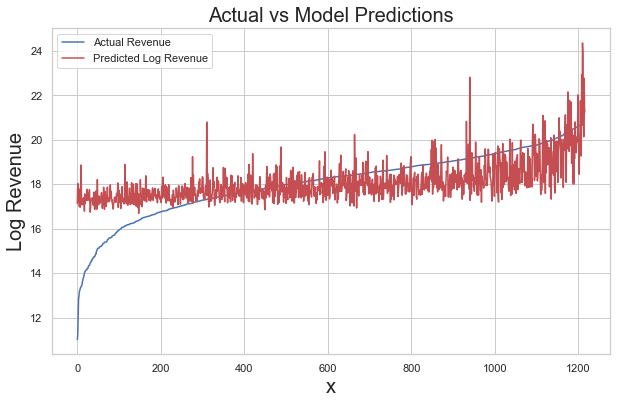

In [181]:
plot_predictions_vs_actual(X, target, results, 'x', 'Log Revenue', 'Actual Revenue', 'Predicted Log Revenue')

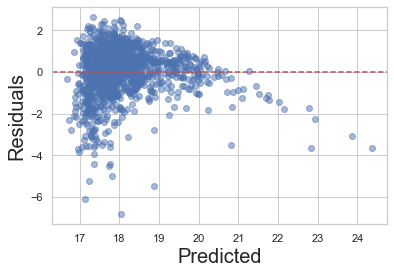

In [182]:
plot_residuals(X, target, results, residuals)

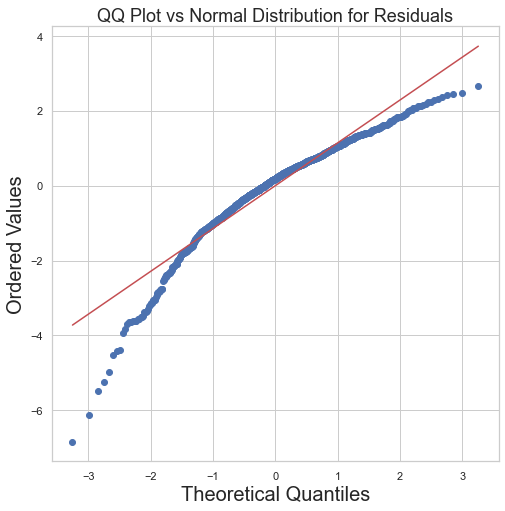

In [183]:
qq_plot(X, target, results)

I did regression using ratings, and they were not useful. I'm going back to just my movies_condensed dataset to look at prod co